In [1]:
import pandas_profiling as pp
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
profile = pp.ProfileReport(train)
profile.to_file(outputfile="output.html")

/home/romas/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def pplot(col_name):
    mis_val = train[col_name].isnull().sum()
    print('Missing: {:.2%} of data in {}'.format(train[col_name].isnull().sum() / len(train[col_name]),col_name))
    print(train[col_name].dtype)
    col_names = ['SalePrice', col_name]
    sns.pairplot(train[col_names])

In [7]:
def pplotlog(var):
    data = pd.concat([train['SalePrice'].apply(lambda x: np.log(x)), train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice')

In [8]:
def bplot(col_name):
    mis_val = train[col_name].isnull().sum()
    print('Missing: {:.2%} of data in {}'.format(train[col_name].isnull().sum() / len(train[col_name]),col_name))
    print(train[col_name].dtype)
    f, ax = plt.subplots(figsize=(16, 8))
    plt.xticks(rotation=45)
    sns.boxplot(x=col_name, y="SalePrice", data=train)

# Columns

### SalePrice

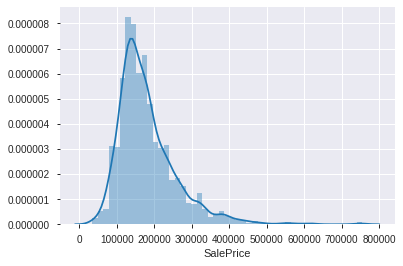

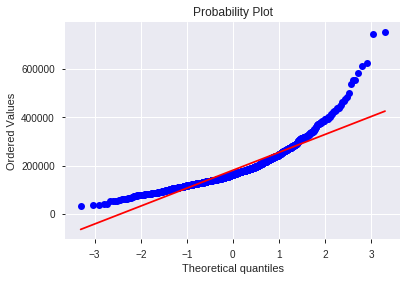

In [9]:
sns.distplot(train['SalePrice'],norm_hist=True);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [10]:
train['SalePrice'] = np.log(train.SalePrice)

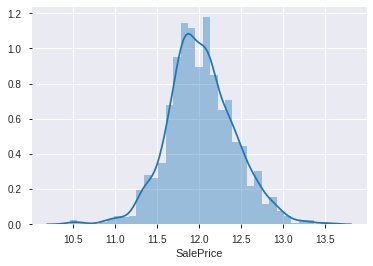

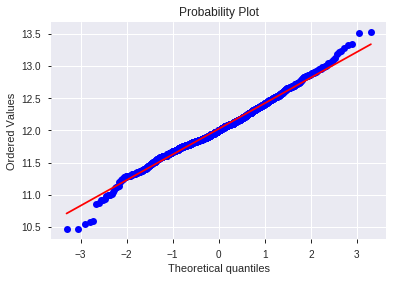

In [11]:
sns.distplot(train['SalePrice'],norm_hist=True);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

### MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Missing: 0.00% of data in MSSubClass
int64


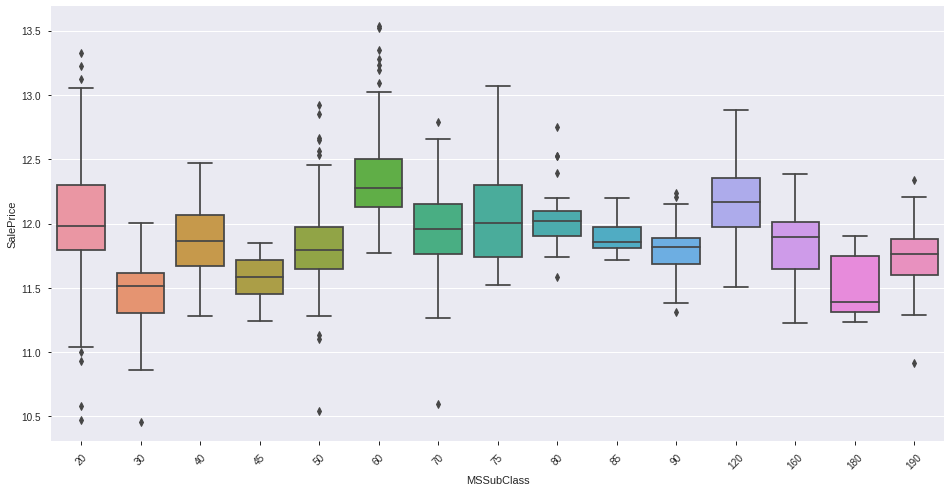

In [12]:
bplot("MSSubClass")

Категории 20, 50, 60 имеют выраженные выбросы в сторону большей цены. <b>Предположение: более новые дома имеют более высокую цену.
Меняем с интов на обжект. Ибо это по сути категории

In [13]:
train.MSSubClass = train.MSSubClass.astype('object')

### MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Missing: 0.00% of data in MSZoning
object


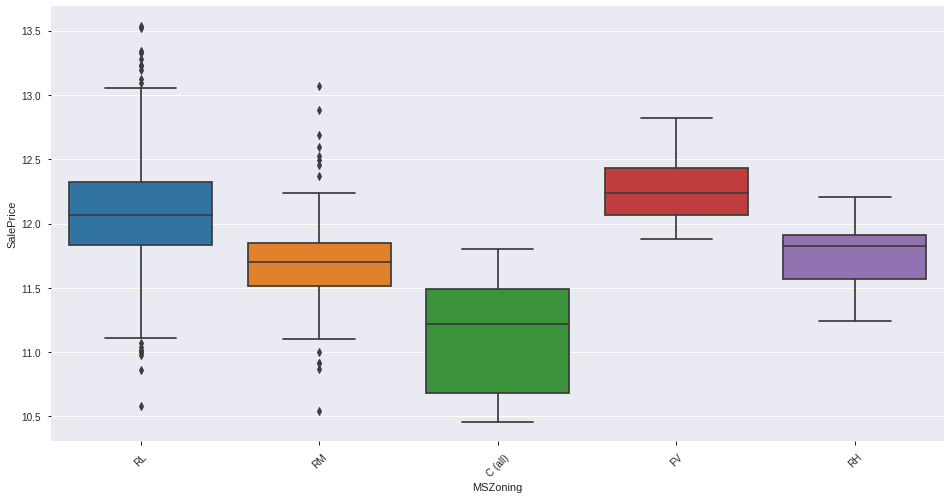

In [14]:
bplot('MSZoning')

1. Из 8ми категорий наличествует только 5.
2. Наблюдается увеличение цены при уменьшении плотности населения

### LotFrontage: Linear feet of street connected to property

Missing: 17.74% of data in LotFrontage
float64


/home/romas/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/romas/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


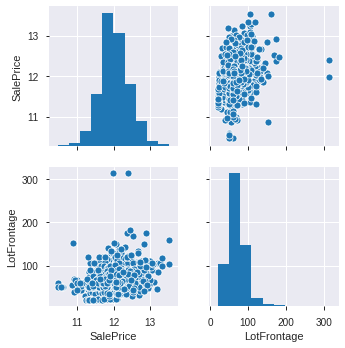

In [15]:
pplot("LotFrontage")

посмотрим, что это за ранчо

In [16]:
train[train.LotFrontage > 200]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,12.396693
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982929


In [17]:
train.drop(train[train.LotFrontage > 200].index, inplace=True)

In [18]:
median_LotFrontage = train.LotFrontage.median()
train.LotFrontage.fillna(median_LotFrontage,inplace=True)

Missing: 0.00% of data in LotFrontage
float64


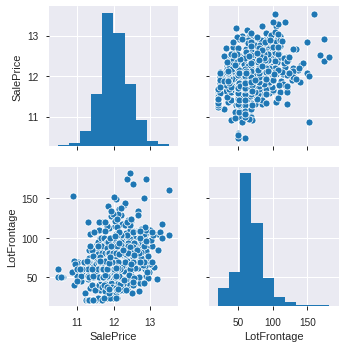

In [19]:
pplot("LotFrontage")

### LotArea: Lot size in square feet

Missing: 0.00% of data in LotArea
int64


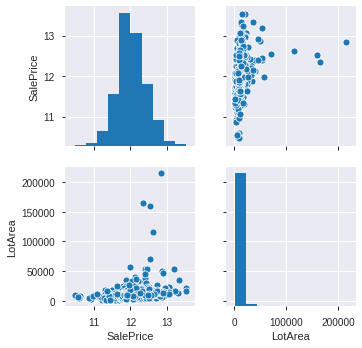

In [20]:
pplot('LotArea')

Гляднем, что это за замки в прериях

In [21]:
train[train.LotArea > 100000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,69.0,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,12.531773
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,12.834681
335,336,190,RL,69.0,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,12.341259
706,707,20,RL,69.0,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,12.618182


выкинем их и поглядим что будет

In [22]:
train.drop(train[train.LotArea > 100000].index,axis=0,inplace=True)

Missing: 0.00% of data in LotArea
int64


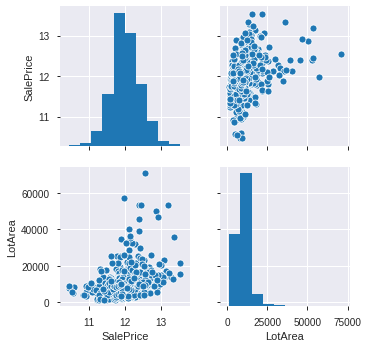

In [23]:
pplot('LotArea')

### Street: Type of road access to property

Missing: 0.00% of data in Street
object


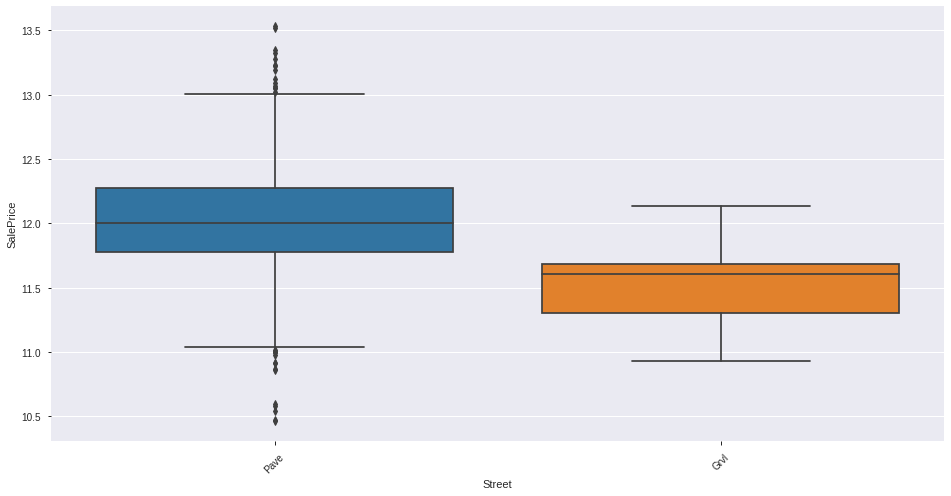

In [24]:
bplot('Street')

### Alley: Type of alley access to property

Missing: 93.74% of data in Alley
object


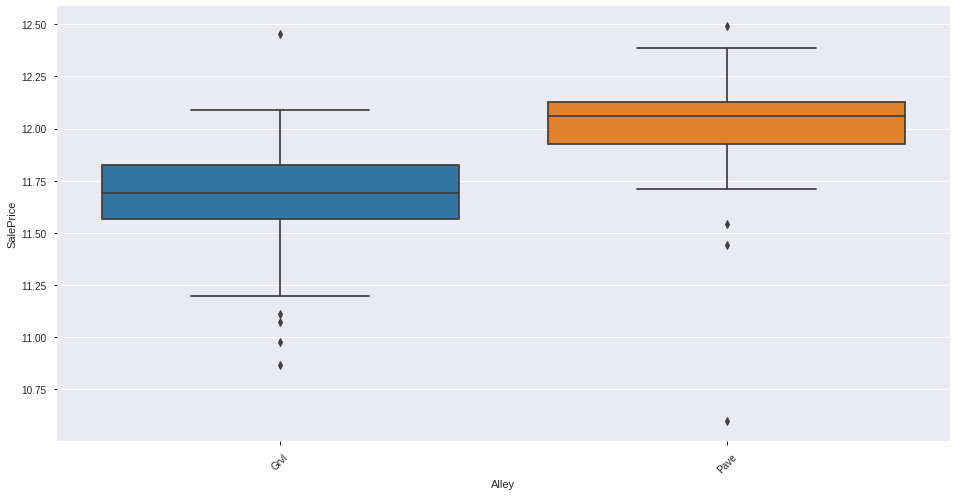

In [25]:
bplot('Alley')

Херня какая-та...
Дропаем

In [26]:
train.drop('Alley', axis=1, inplace=True)

### LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

Missing: 0.00% of data in LotShape
object


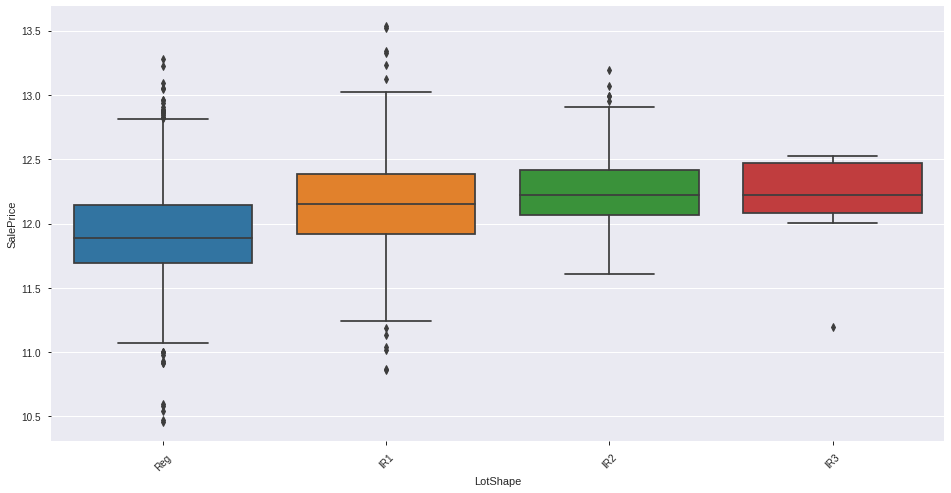

In [27]:
bplot('LotShape')

In [28]:
train.groupby('LotShape').Id.count()

LotShape
IR1    483
IR2     38
IR3      8
Reg    925
Name: Id, dtype: int64

Можно придумать с натягом, что регулярной формы участки стоят дешевле чем иррегулярной.

### LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Missing: 0.00% of data in LandContour
object


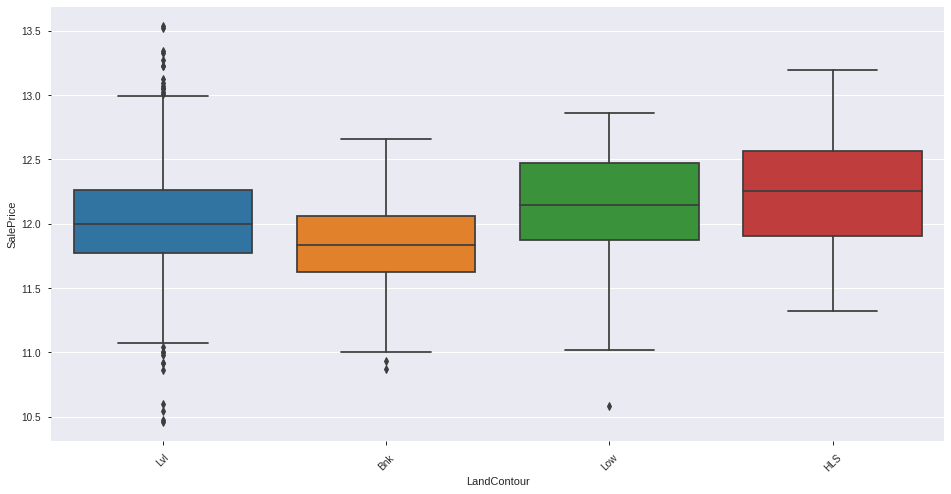

In [29]:
bplot('LandContour')

Ничего интересного, едем дальше

### Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

Missing: 0.00% of data in Utilities
object


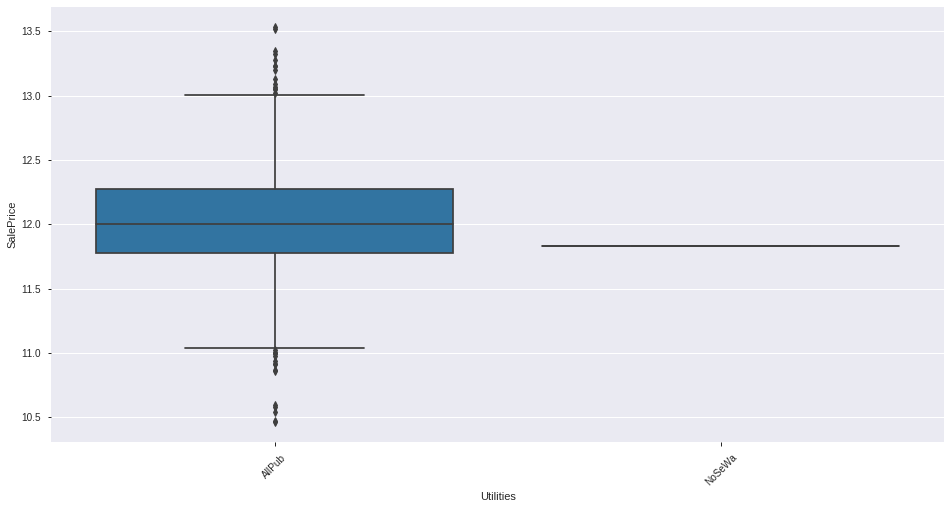

In [30]:
bplot('Utilities')

Что это за бомжатник?

In [31]:
train[train.Utilities == 'NoSeWa']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,945,20,RL,69.0,14375,Pave,IR1,Lvl,NoSeWa,CulDSac,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,11.831379


Дропаем.

In [32]:
train.drop('Utilities',axis=1,inplace=True)

### LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

Missing: 0.00% of data in LotConfig
object


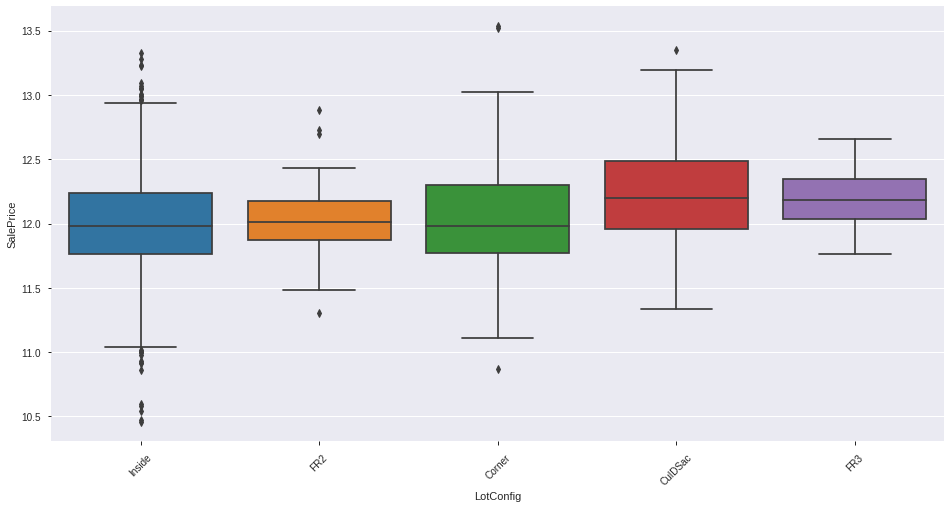

In [33]:
bplot('LotConfig')

### LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

Missing: 0.00% of data in LandSlope
object


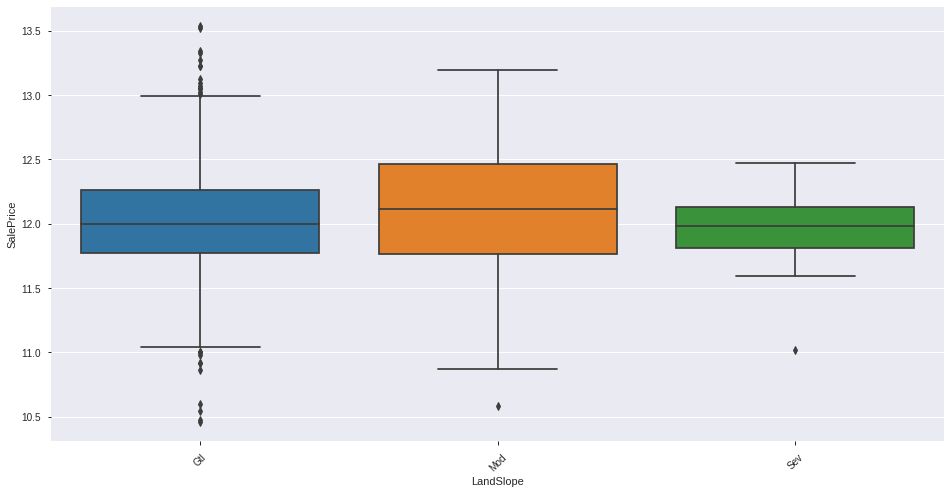

In [34]:
bplot('LandSlope')

### Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Missing: 0.00% of data in Neighborhood
object


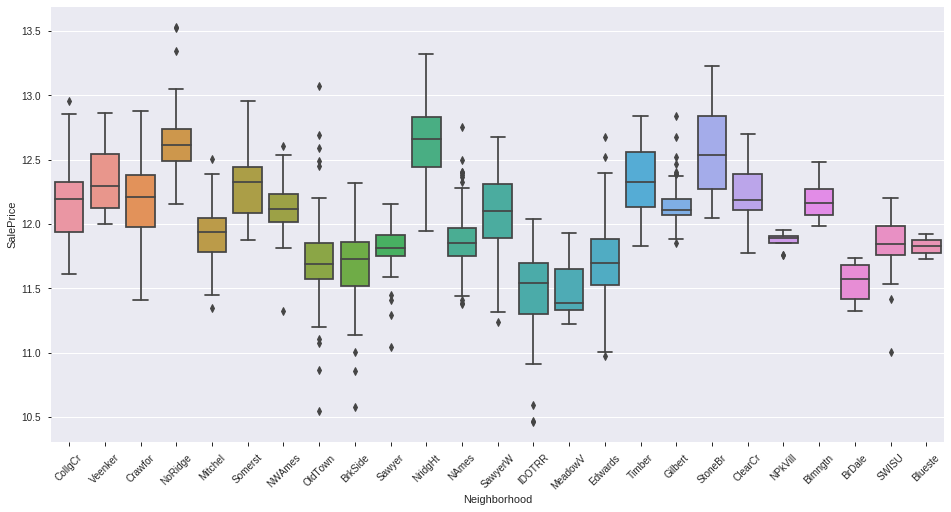

In [35]:
bplot('Neighborhood')

Тут видно, что есть богатые, а есть и бедные районы.

### Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Missing: 0.00% of data in Condition1
object


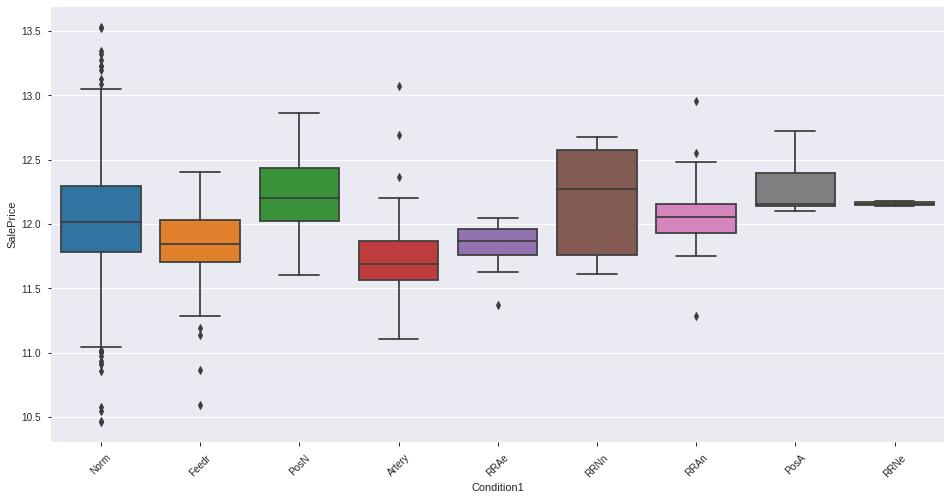

In [36]:
bplot('Condition1')

Оставляем как есть

### Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Missing: 0.00% of data in Condition2
object


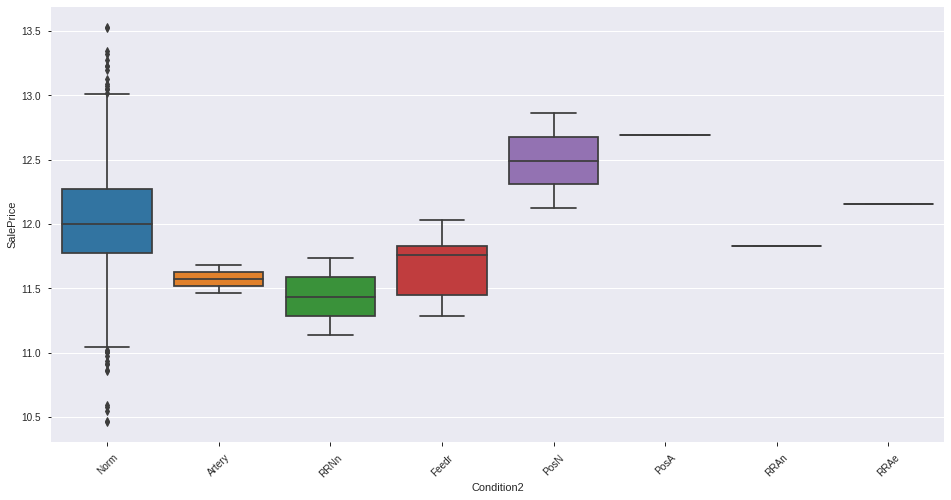

In [37]:
bplot('Condition2')

Оставляем как есть

### BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

Missing: 0.00% of data in BldgType
object


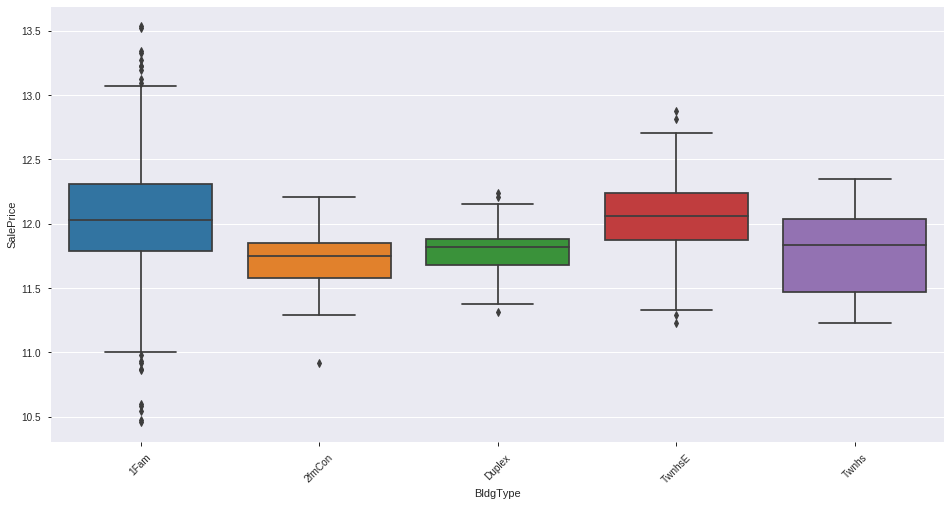

In [38]:
bplot('BldgType')

### HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Missing: 0.00% of data in HouseStyle
object


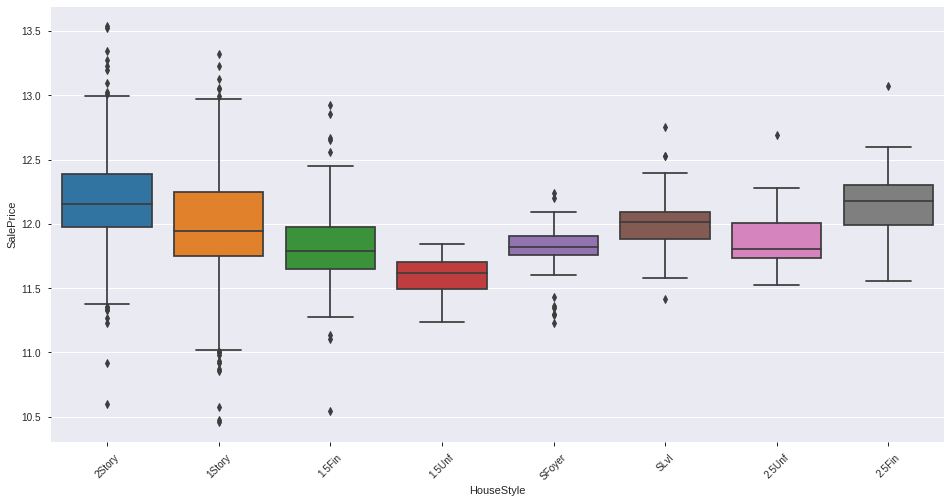

In [39]:
bplot('HouseStyle')

### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

Missing: 0.00% of data in OverallQual
int64


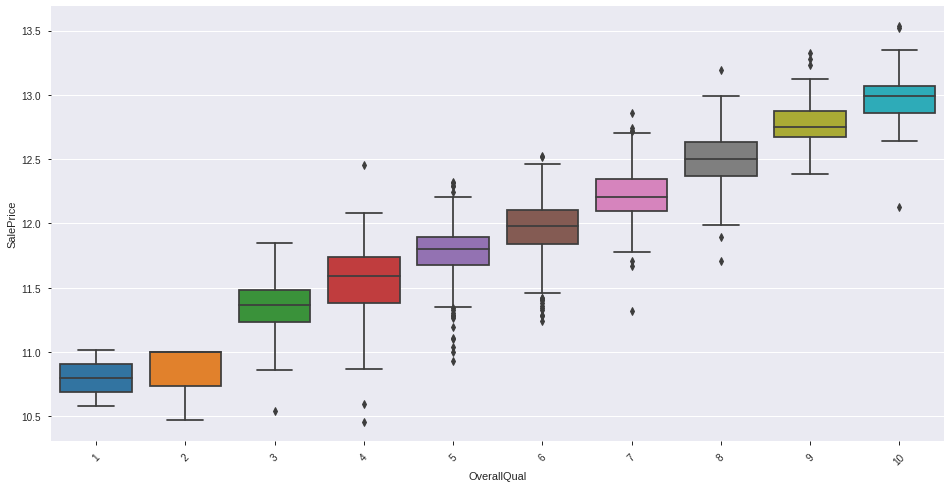

In [40]:
bplot('OverallQual')

всетаки это не числовой признак, а категориальный.

In [41]:
train.OverallQual = train.OverallQual.astype('object')

### OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

Missing: 0.00% of data in OverallCond
int64


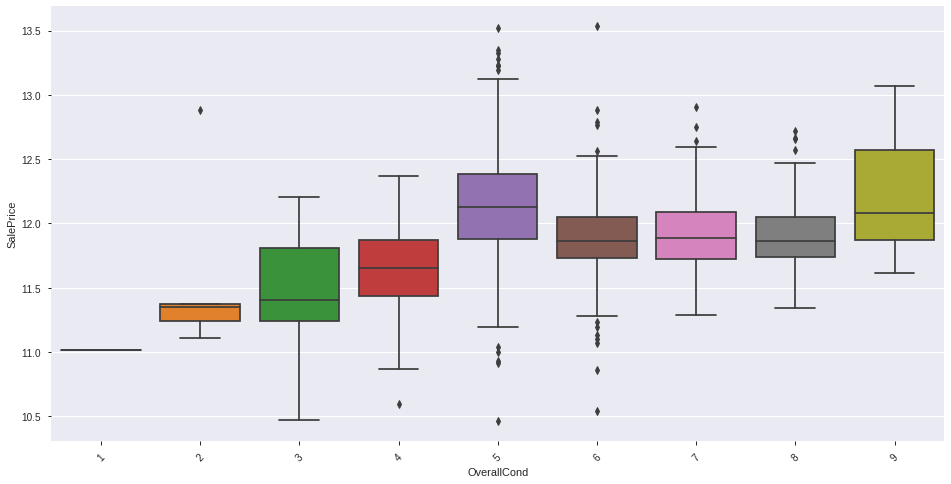

In [42]:
bplot('OverallCond')

In [43]:
train.OverallCond = train.OverallCond.astype('object')

### YearBuilt: Original construction date

Missing: 0.00% of data in YearBuilt
int64


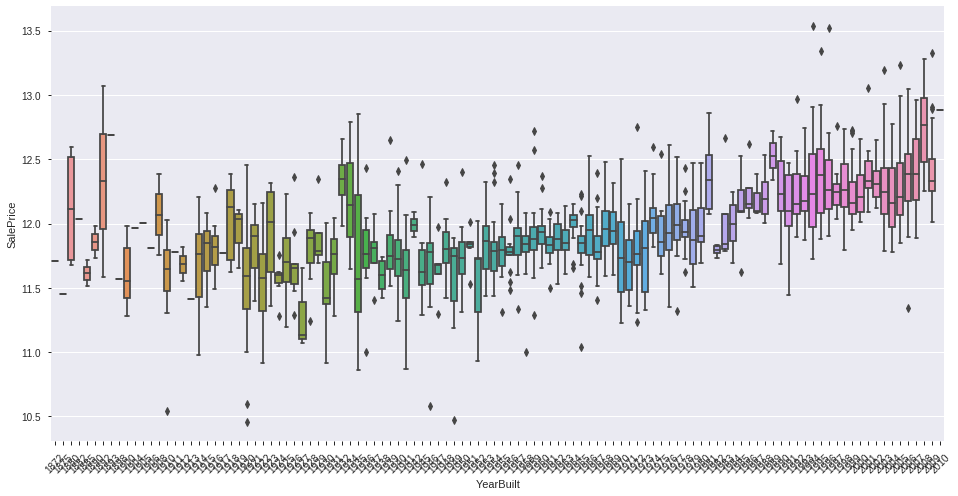

In [44]:
bplot('YearBuilt')

In [45]:
train.drop('YearBuilt',axis=1,inplace=True)

### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

Missing: 0.00% of data in YearRemodAdd
int64


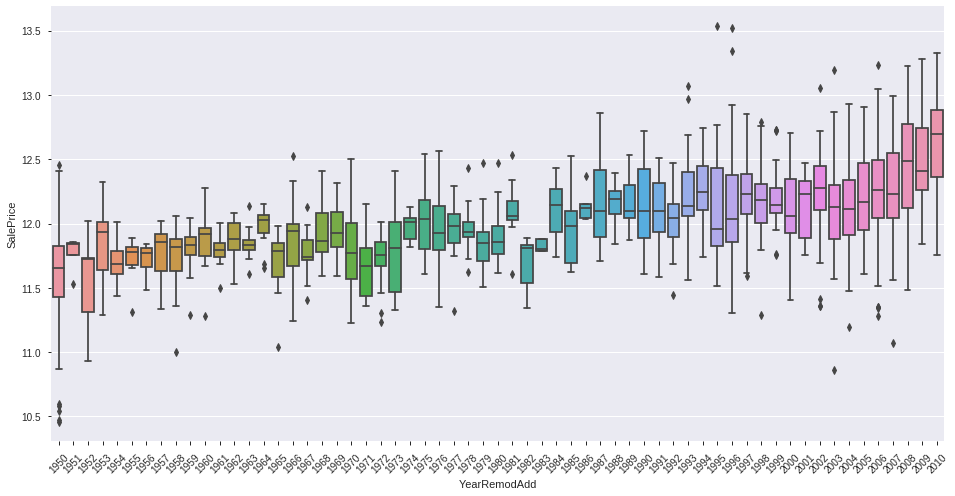

In [46]:
bplot('YearRemodAdd')

In [47]:
train.drop('YearRemodAdd',axis=1,inplace=True)

### RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

Missing: 0.00% of data in RoofStyle
object


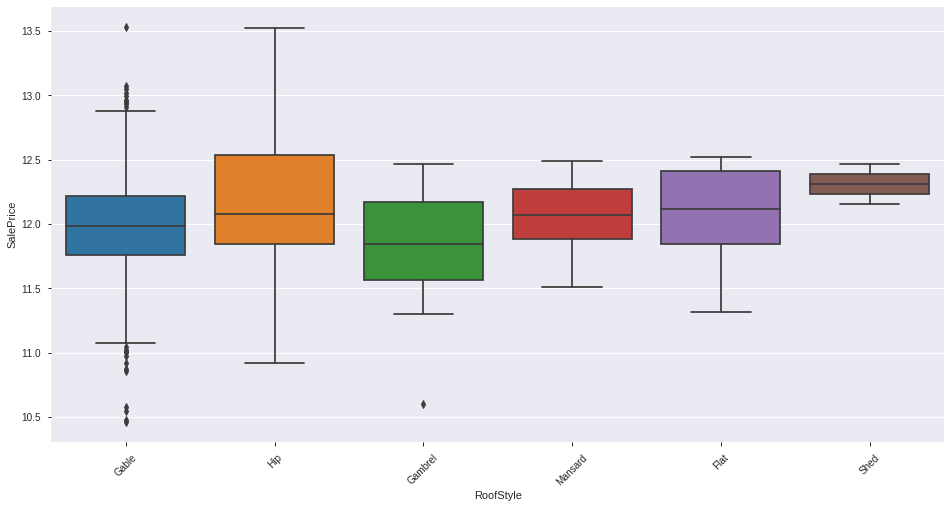

In [48]:
bplot('RoofStyle')

### RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Missing: 0.00% of data in RoofMatl
object


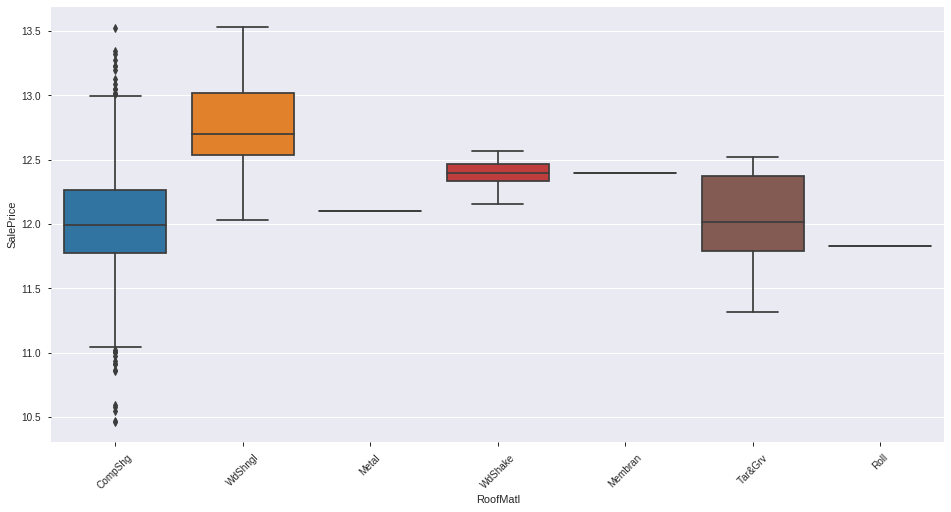

In [49]:
bplot('RoofMatl')

### Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Missing: 0.00% of data in Exterior1st
object


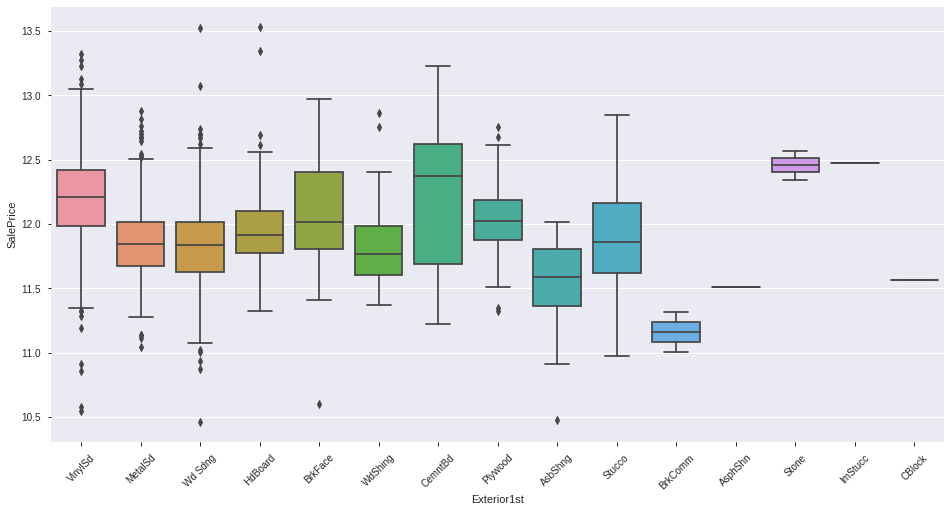

In [50]:
bplot('Exterior1st')

### Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Missing: 0.00% of data in Exterior2nd
object


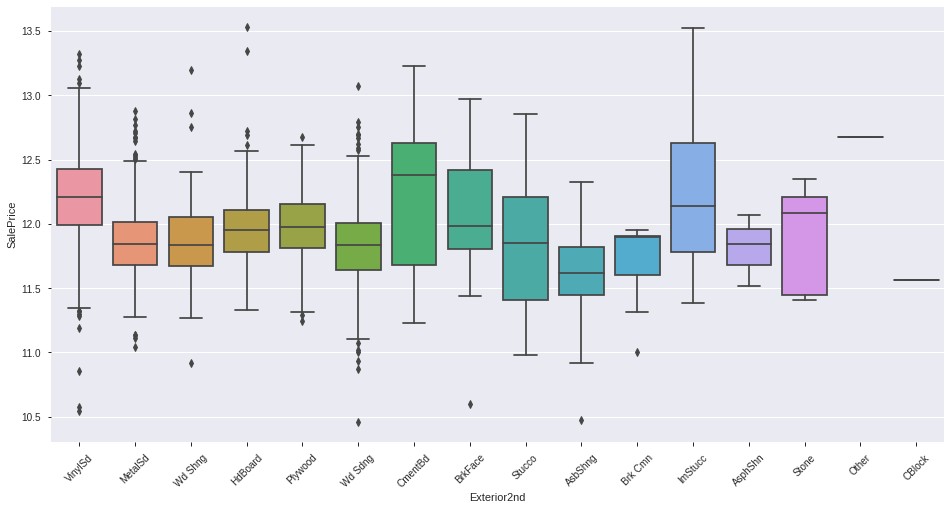

In [51]:
bplot('Exterior2nd')

### MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

Missing: 0.55% of data in MasVnrType
object


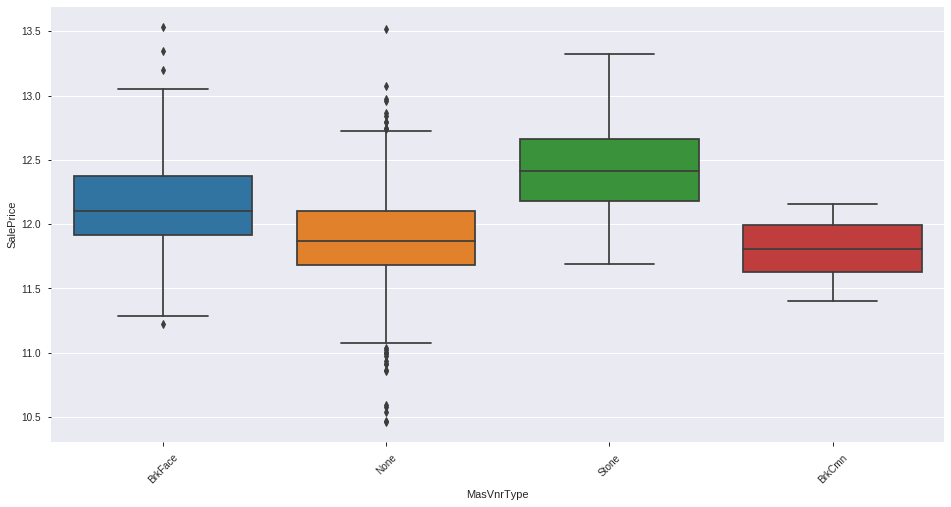

In [52]:
bplot('MasVnrType')

In [53]:
train.MasVnrType.fillna('None',inplace=True)

Missing: 0.00% of data in MasVnrType
object


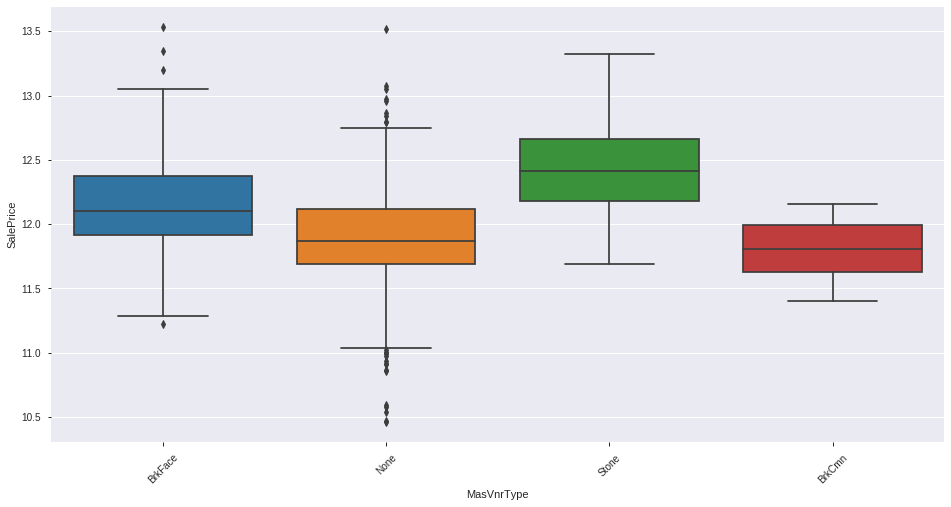

In [54]:
bplot('MasVnrType')

### MasVnrArea: Masonry veneer area in square feet

Missing: 0.55% of data in MasVnrArea
float64


/home/romas/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/romas/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


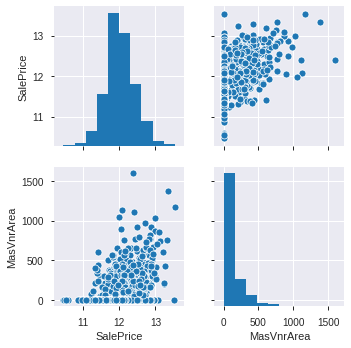

In [55]:
pplot("MasVnrArea")

In [57]:
train.MasVnrArea.fillna(0,inplace=True)

Missing: 0.00% of data in MasVnrArea
float64


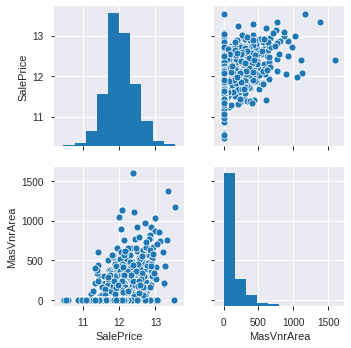

In [58]:
pplot("MasVnrArea")

In [56]:
train.drop('MasVnrArea',axis=1,inplace=True)

### ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Missing: 0.00% of data in ExterQual
object


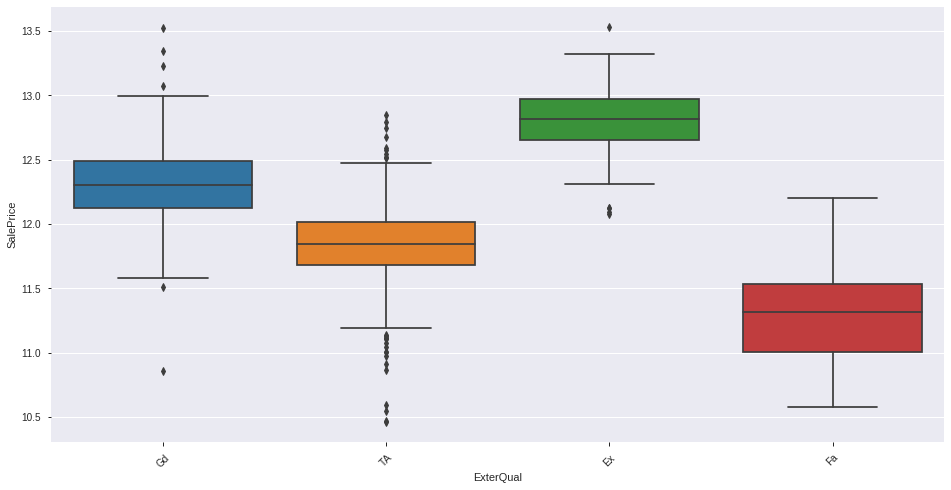

In [57]:
bplot('ExterQual')

### ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Missing: 0.00% of data in ExterCond
object


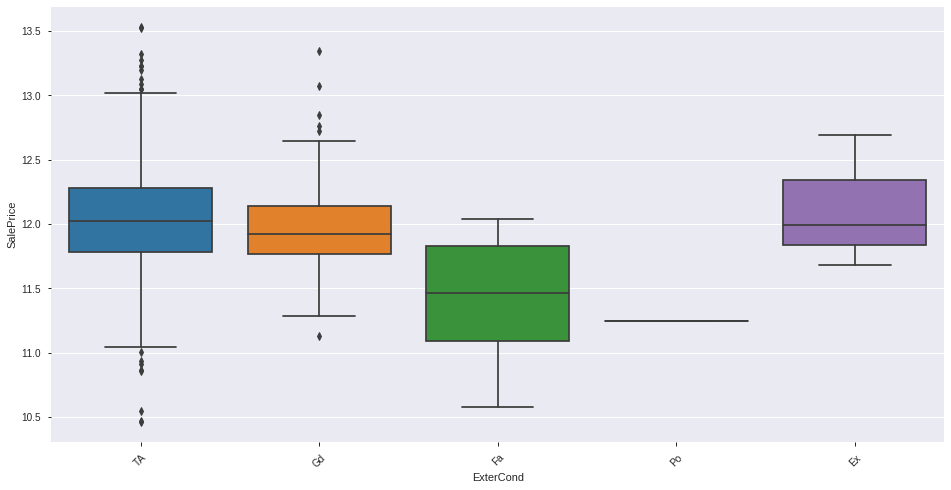

In [58]:
bplot('ExterCond')

### Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

Missing: 0.00% of data in Foundation
object


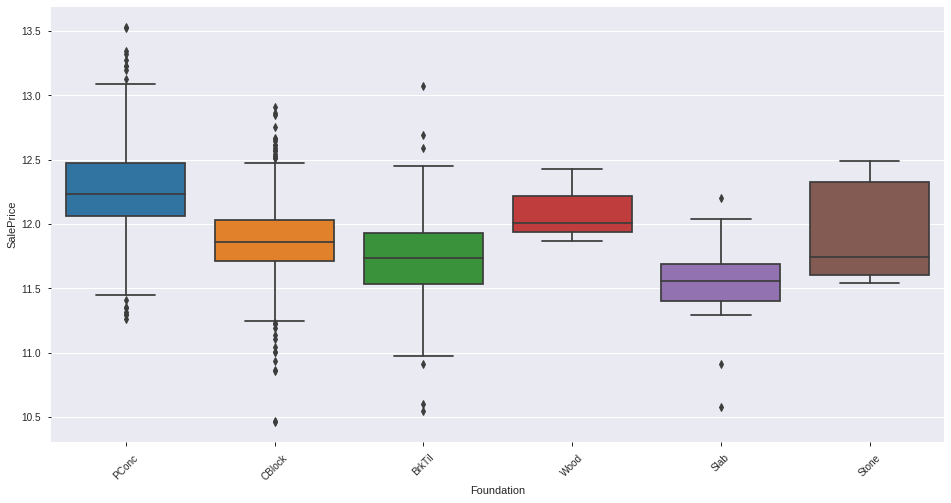

In [59]:
bplot('Foundation')

### BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

Missing: 2.54% of data in BsmtQual
object


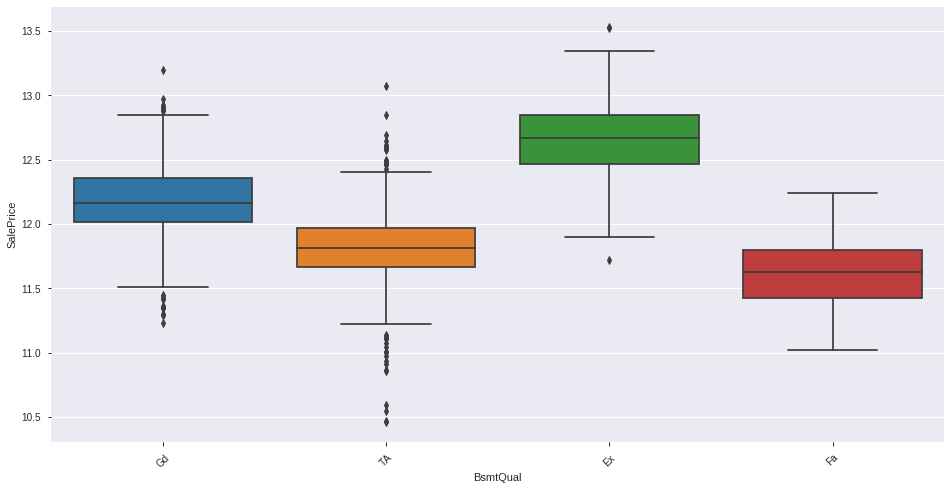

In [60]:
bplot('BsmtQual')

In [61]:
train.BsmtQual.fillna('NA', inplace=True)

Missing: 0.00% of data in BsmtQual
object


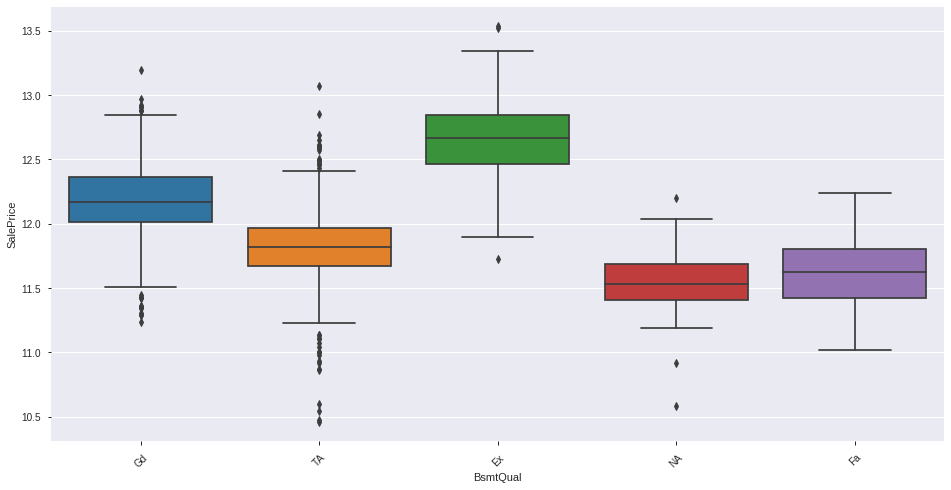

In [62]:
bplot('BsmtQual')

### BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

Missing: 2.54% of data in BsmtCond
object


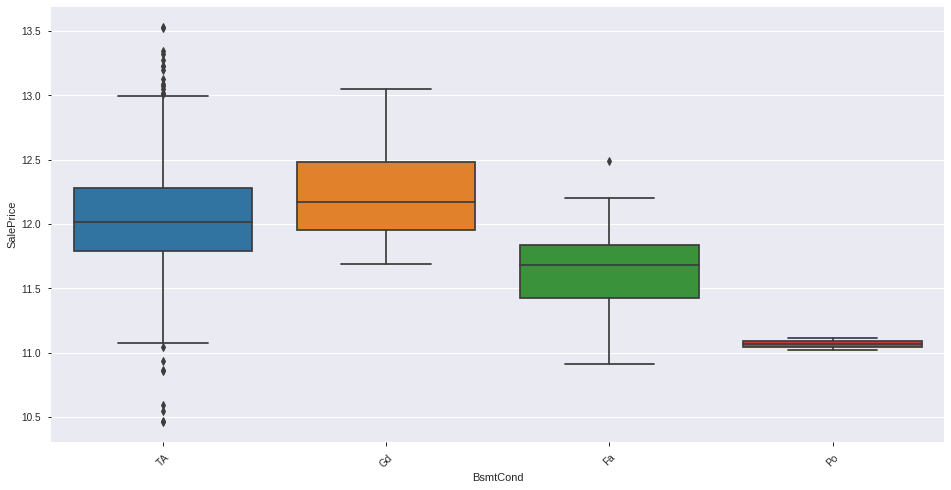

In [63]:
bplot('BsmtCond')

In [64]:
train.BsmtCond.fillna('NA', inplace=True)

Missing: 0.00% of data in BsmtCond
object


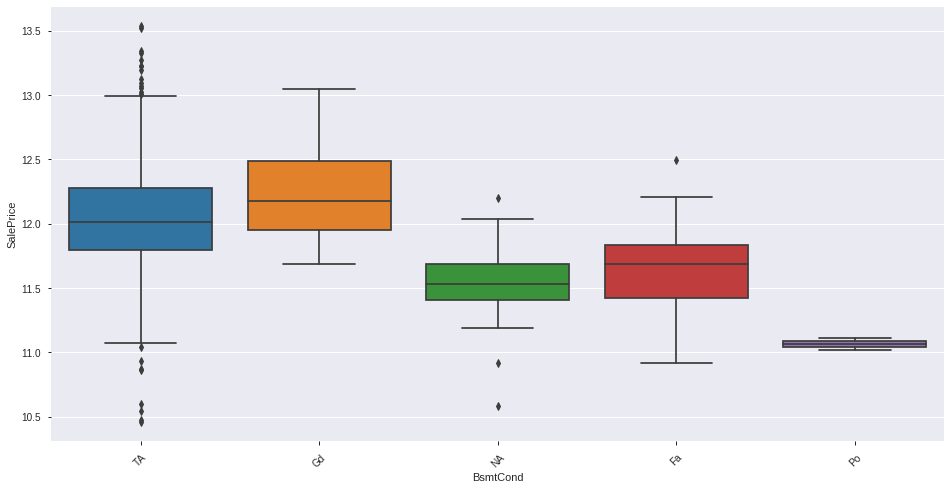

In [65]:
bplot('BsmtCond')

### BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

Missing: 2.61% of data in BsmtExposure
object


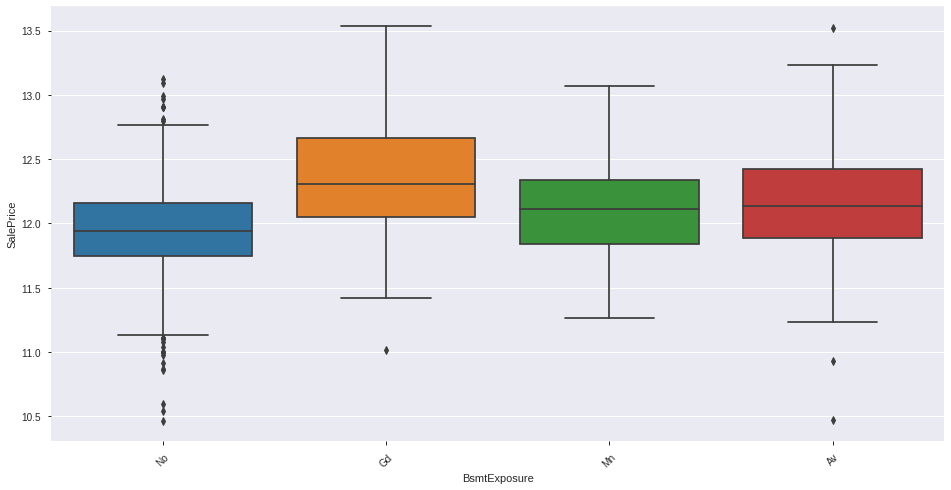

In [66]:
bplot('BsmtExposure')

In [67]:
train.BsmtExposure.fillna('No',inplace=True)

Missing: 0.00% of data in BsmtExposure
object


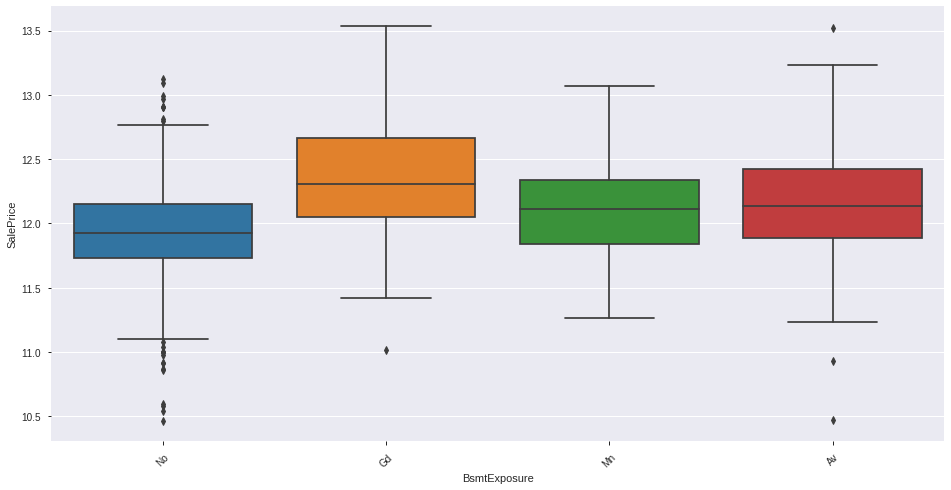

In [68]:
bplot('BsmtExposure')

### BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Missing: 2.54% of data in BsmtFinType1
object


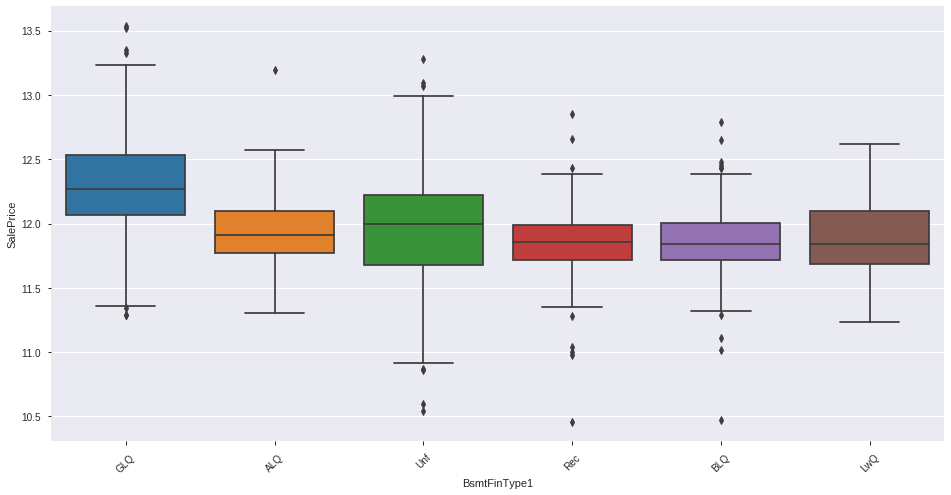

In [69]:
bplot('BsmtFinType1')

In [70]:
train.BsmtFinType1.fillna('NA',inplace=True)

Missing: 0.00% of data in BsmtFinType1
object


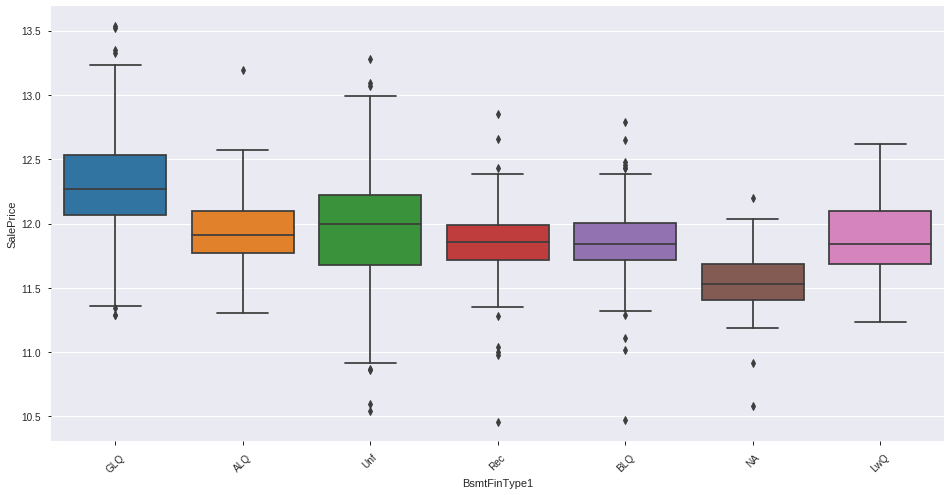

In [71]:
bplot('BsmtFinType1')

### BsmtFinSF1: Type 1 finished square feet

Missing: 0.00% of data in BsmtFinSF1
int64


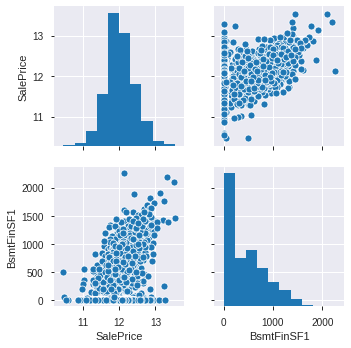

In [72]:
pplot('BsmtFinSF1')

### BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Missing: 2.61% of data in BsmtFinType2
object


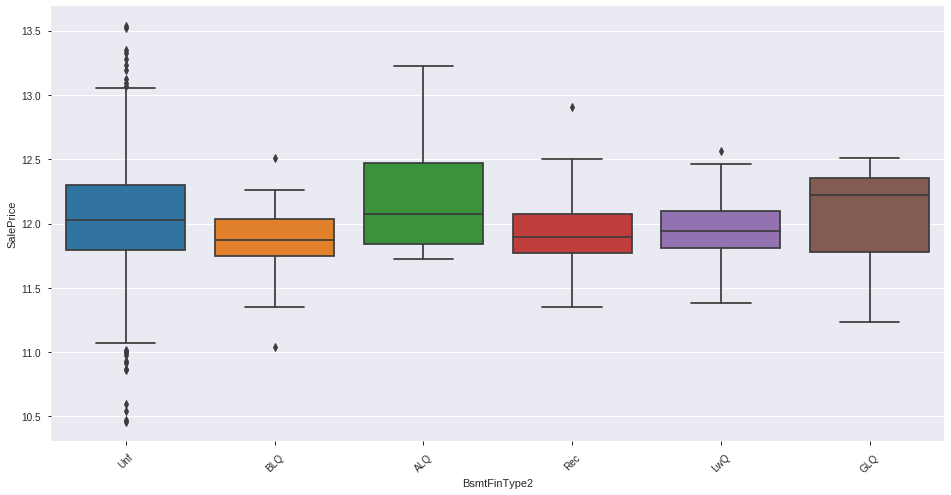

In [73]:
bplot('BsmtFinType2')

In [74]:
train.BsmtFinType2.fillna('NA', inplace=True)

Missing: 0.00% of data in BsmtFinType2
object


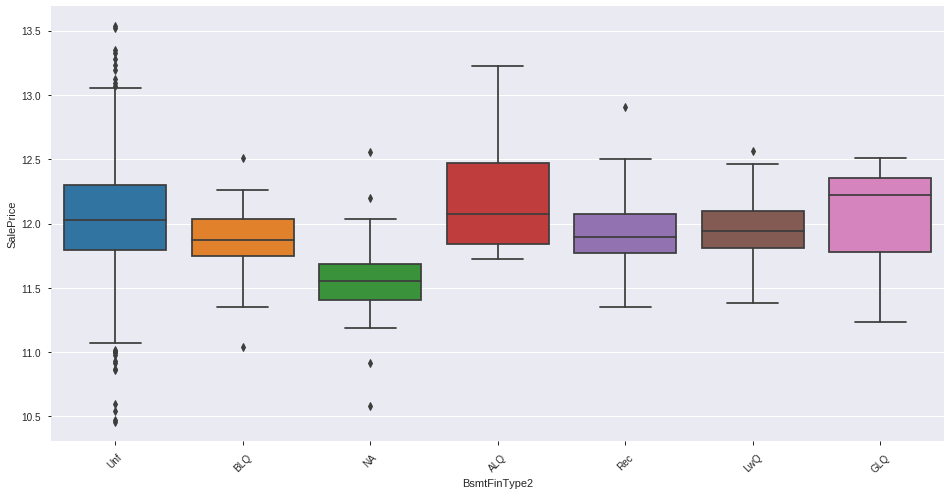

In [75]:
bplot('BsmtFinType2')

соберем переменную из данных по площади подвала:

In [76]:
train.TotalBsmtSF = train.TotalBsmtSF + train.BsmtFinSF1 + train.BsmtFinSF2 + train.BsmtUnfSF

In [77]:
train.drop(['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF'], inplace=True, axis=1)

### Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

Missing: 0.00% of data in Heating
object


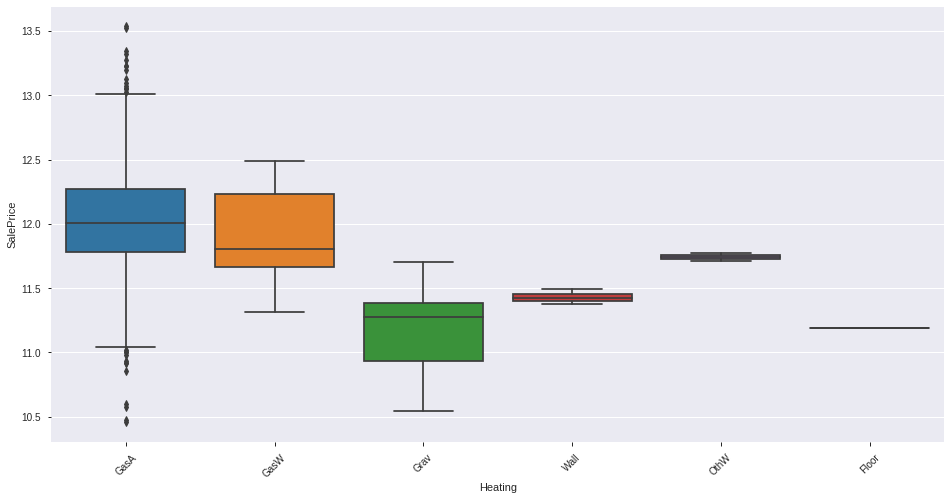

In [78]:
bplot('Heating')

### HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Missing: 0.00% of data in HeatingQC
object


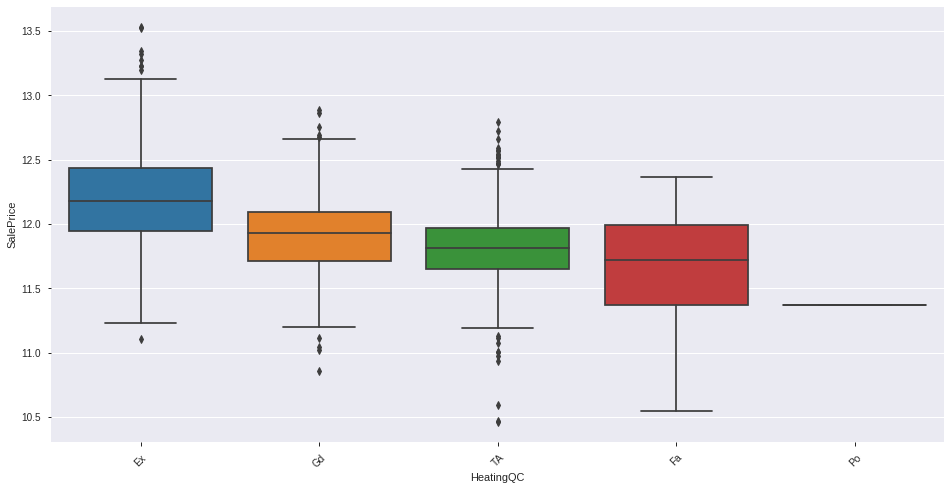

In [79]:
bplot("HeatingQC")

### CentralAir: Central air conditioning

       N	No
       Y	Yes

Missing: 0.00% of data in CentralAir
object


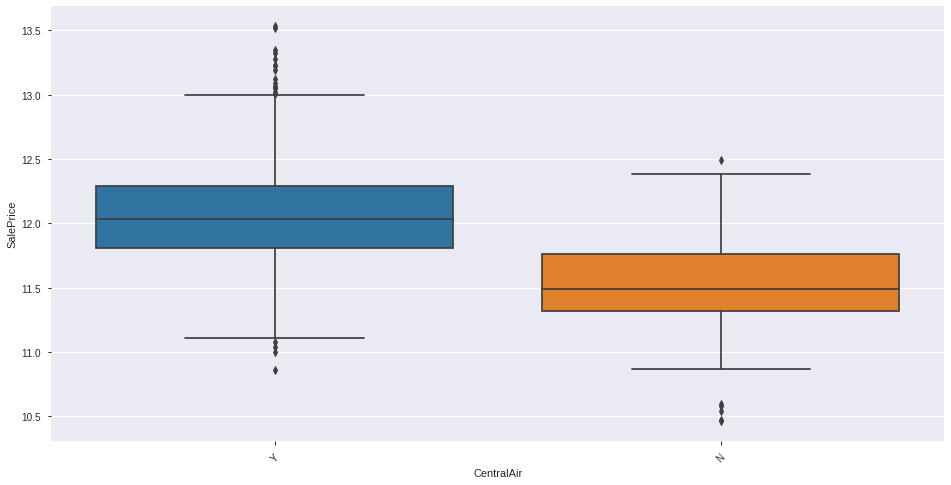

In [80]:
bplot('CentralAir')

### Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

Missing: 0.07% of data in Electrical
object


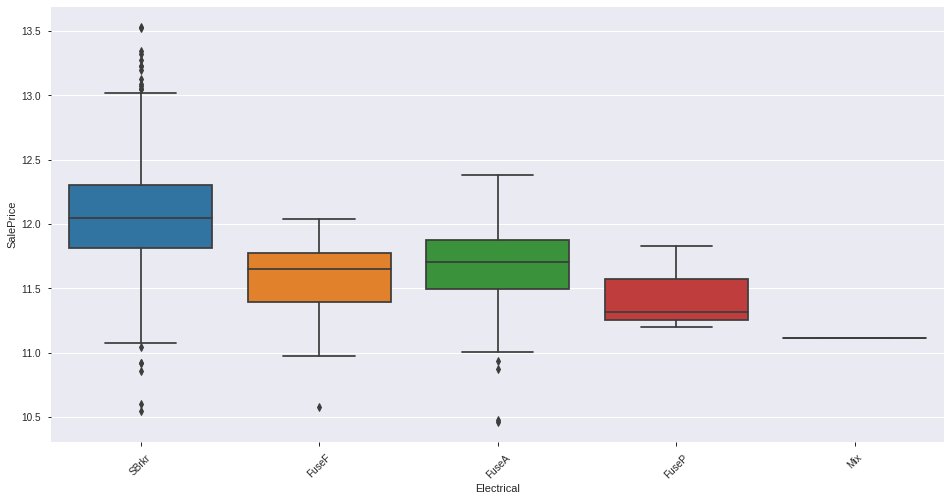

In [81]:
bplot('Electrical')

In [82]:
train.Electrical = train.Electrical.apply(lambda x: 'SBrkr' if x == 'SBrkr' else 'NonSB')

Missing: 0.00% of data in Electrical
object


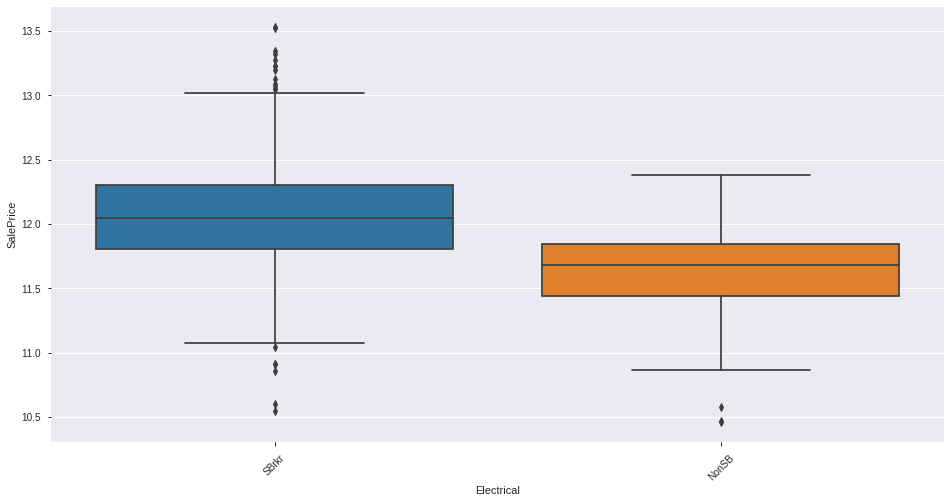

In [83]:
bplot('Electrical')

### 1stFlrSF: First Floor square feet

Missing: 0.00% of data in 1stFlrSF
int64


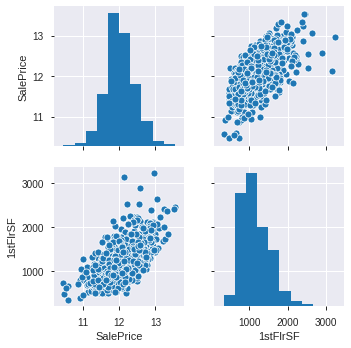

In [84]:
pplot('1stFlrSF')

In [85]:
train[(train['1stFlrSF'] > 3000) & (train.SalePrice < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
496,497,20,RL,69.0,12692,Pave,IR1,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.971540
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,Inside,Gtl,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126759


In [86]:
train.drop(train[(train['1stFlrSF'] > 3000) & (train.SalePrice < 200000)].index, inplace=True)

Missing: 0.00% of data in 1stFlrSF
int64


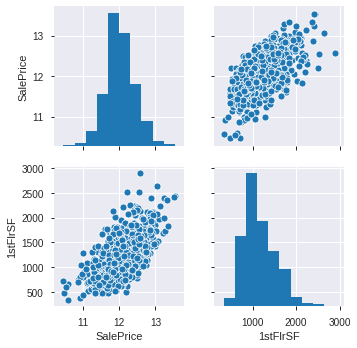

In [87]:
pplot('1stFlrSF')

### 2ndFlrSF: Second floor square feet

Missing: 0.00% of data in 2ndFlrSF
int64


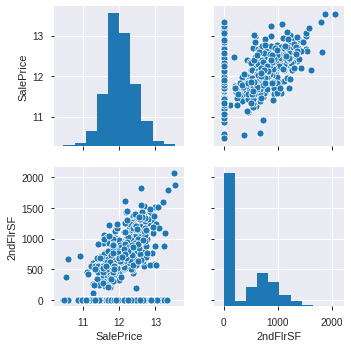

In [88]:
pplot('2ndFlrSF')

### LowQualFinSF: Low quality finished square feet (all floors)

Missing: 0.00% of data in LowQualFinSF
int64


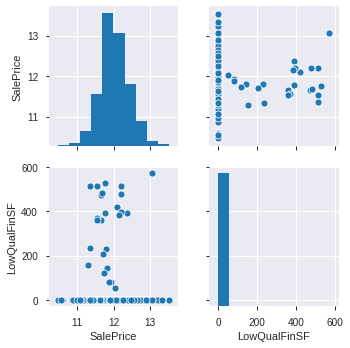

In [89]:
pplot('LowQualFinSF')

In [90]:
train.drop('LowQualFinSF', inplace=True, axis=1)

### GrLivArea: Above grade (ground) living area square feet

Missing: 0.00% of data in GrLivArea
int64


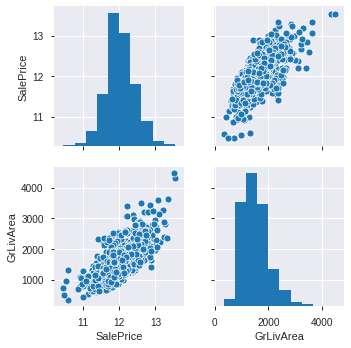

In [91]:
pplot('GrLivArea')

In [92]:
train.drop(train[(train['GrLivArea']>4000)].index, inplace=True)

Missing: 0.00% of data in GrLivArea
int64


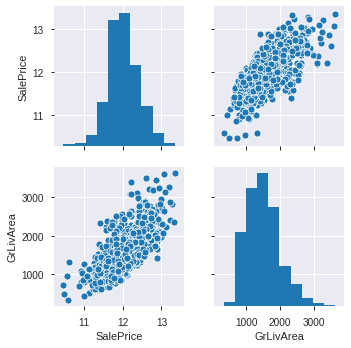

In [93]:
pplot('GrLivArea')

### KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

Missing: 0.00% of data in KitchenQual
object


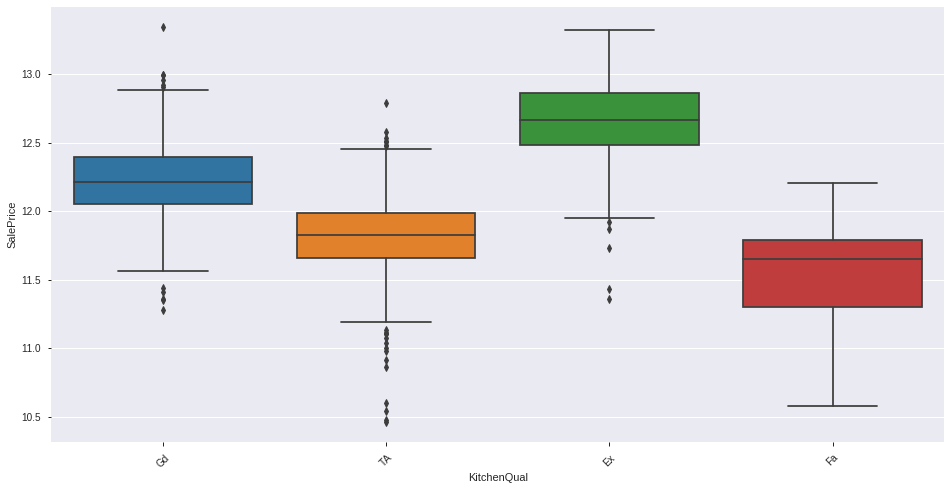

In [94]:
bplot('KitchenQual')

### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Missing: 0.00% of data in TotRmsAbvGrd
int64


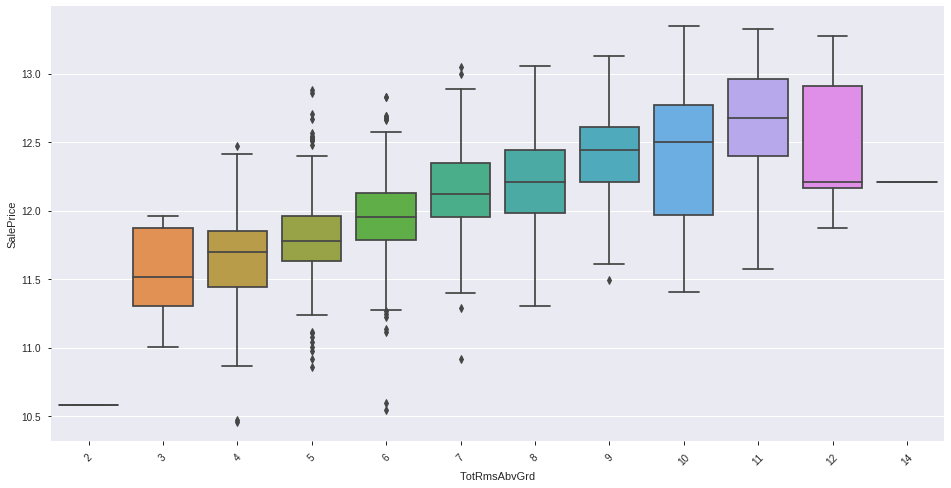

In [95]:
bplot('TotRmsAbvGrd')

### Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Missing: 0.00% of data in Functional
object


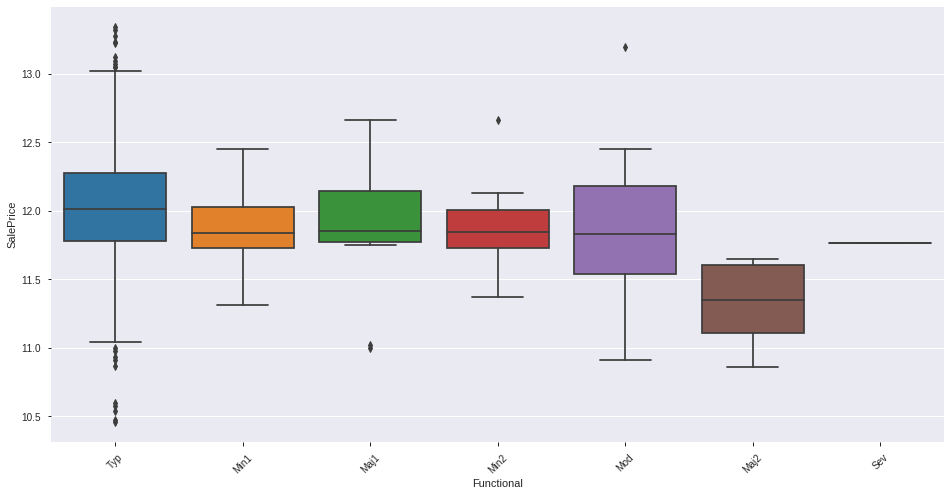

In [96]:
bplot('Functional')

### Fireplaces: Number of fireplaces

Missing: 0.00% of data in Fireplaces
int64


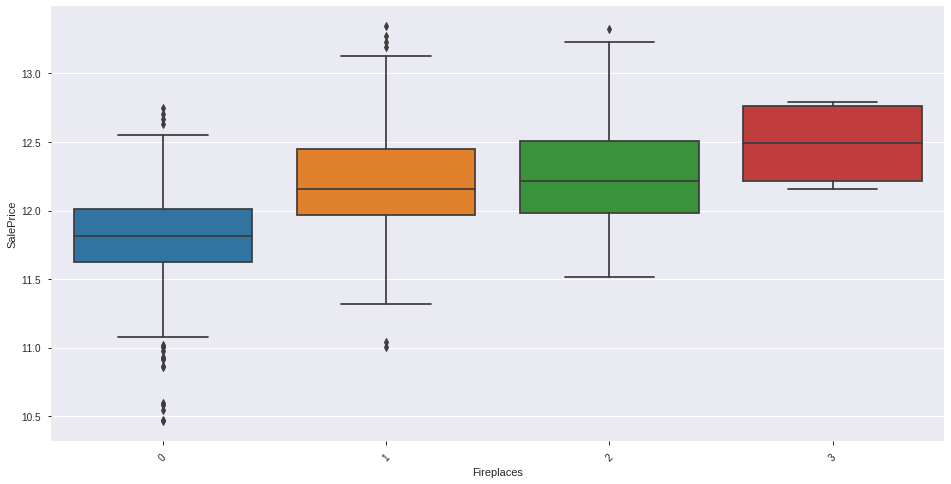

In [97]:
bplot('Fireplaces')

### FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

Missing: 47.59% of data in FireplaceQu
object


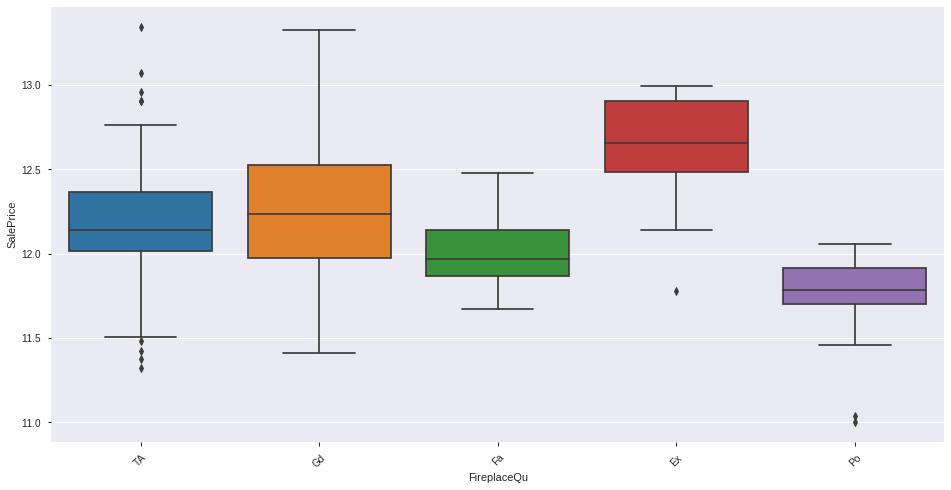

In [98]:
bplot('FireplaceQu')

In [99]:
train.FireplaceQu.fillna('NA', inplace=True)

Missing: 0.00% of data in FireplaceQu
object


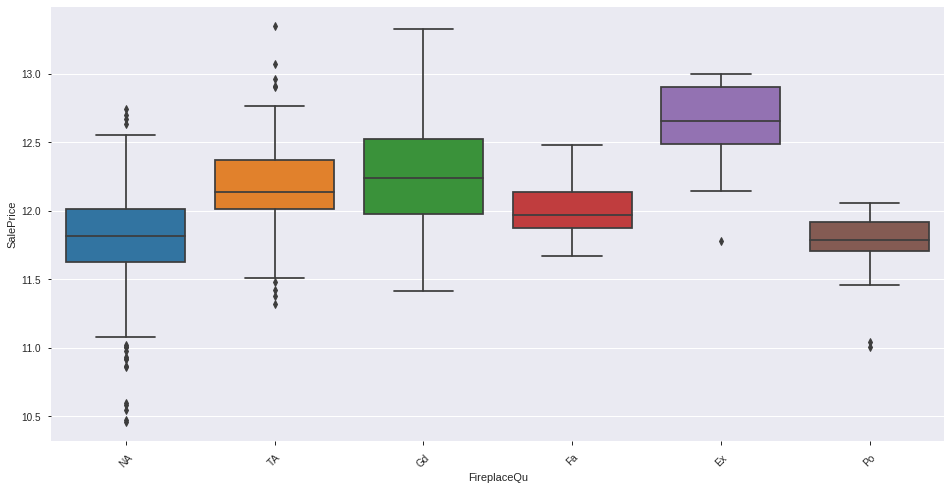

In [100]:
bplot('FireplaceQu')

### GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Missing: 5.59% of data in GarageType
object


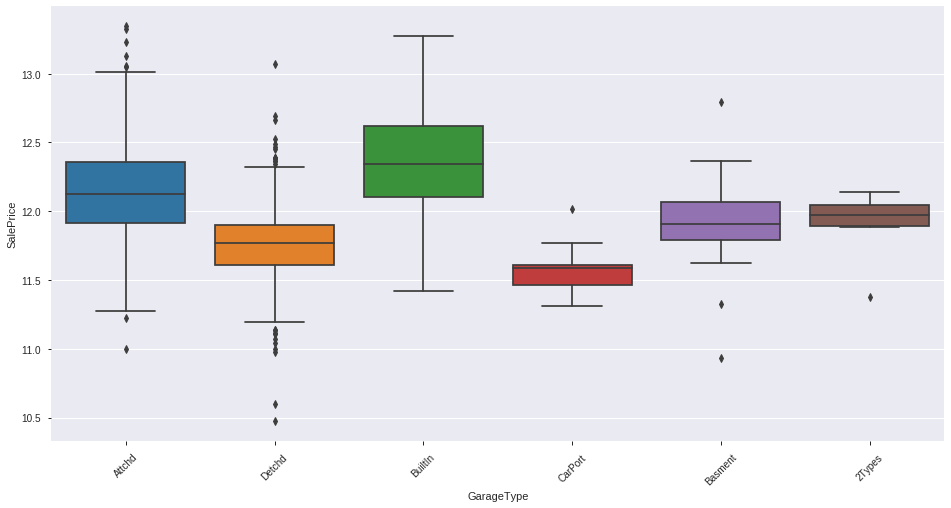

In [101]:
bplot('GarageType')

In [102]:
train.GarageType.fillna('NA', inplace=True)

Missing: 0.00% of data in GarageType
object


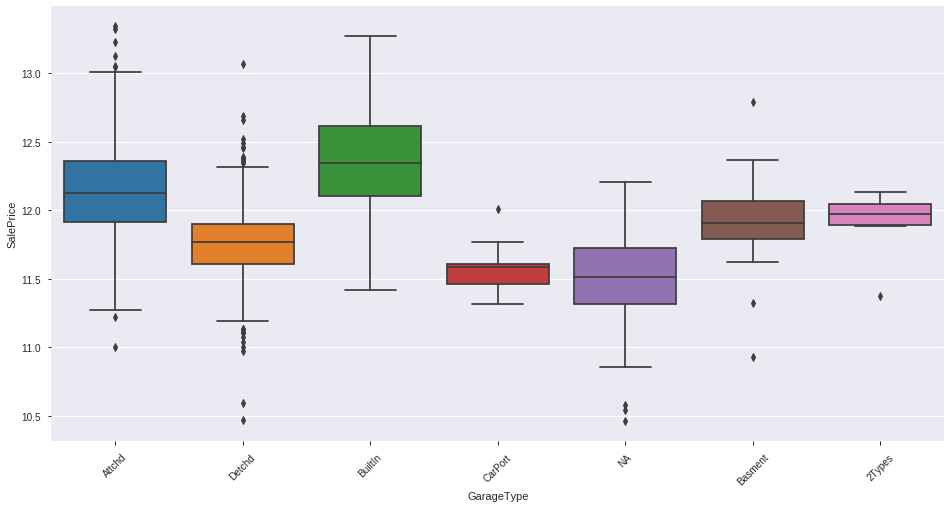

In [103]:
bplot('GarageType')

### GarageYrBlt: Year garage was built

Missing: 5.59% of data in GarageYrBlt
float64


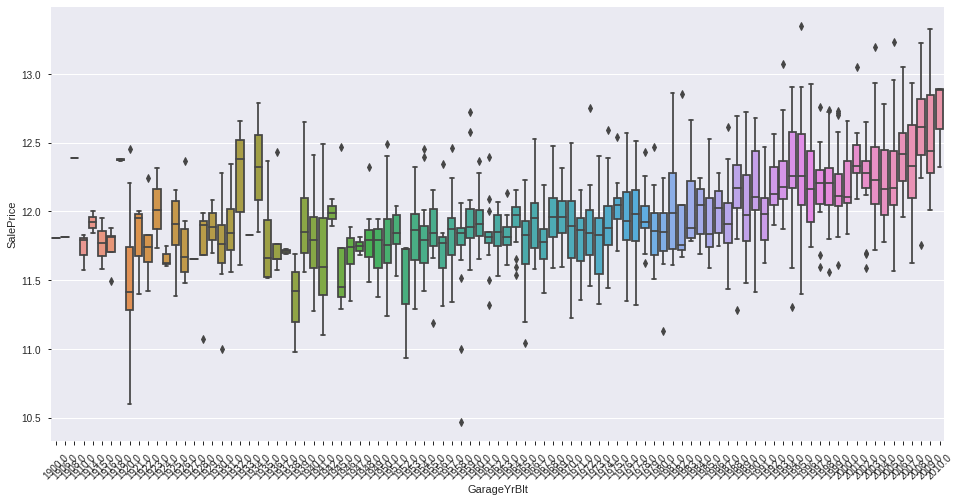

In [104]:
bplot('GarageYrBlt')

In [105]:
train.drop('GarageYrBlt',inplace=True, axis=1)

### GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Missing: 5.59% of data in GarageFinish
object


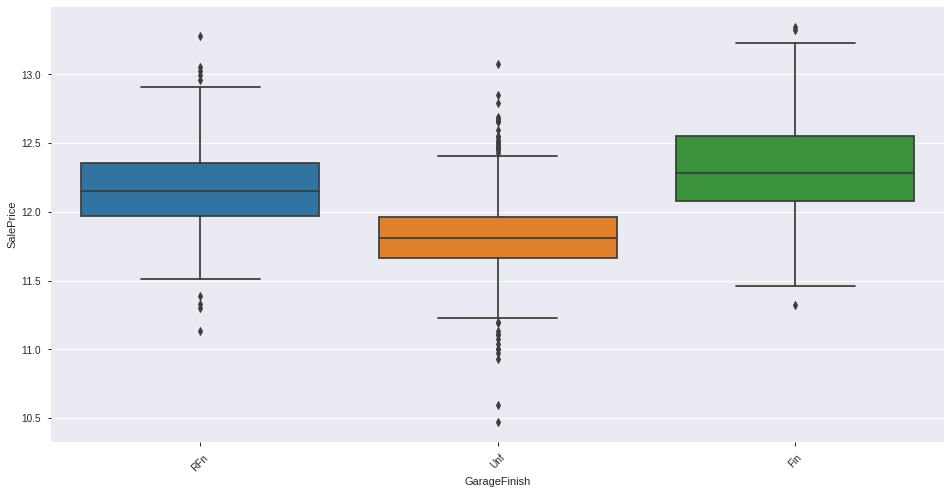

In [106]:
bplot('GarageFinish')

In [107]:
train.GarageFinish.fillna('NA', inplace=True)

Missing: 0.00% of data in GarageFinish
object


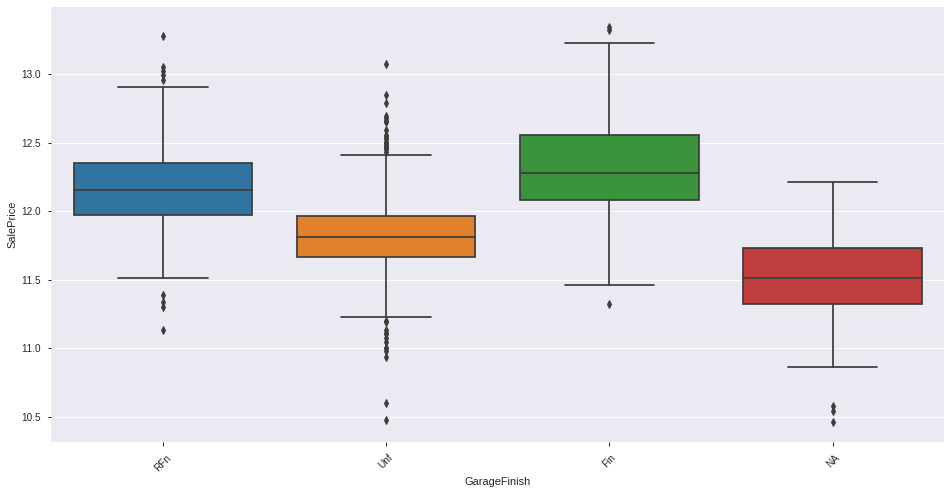

In [108]:
bplot('GarageFinish')

### GarageCars: Size of garage in car capacity

Missing: 0.00% of data in GarageCars
int64


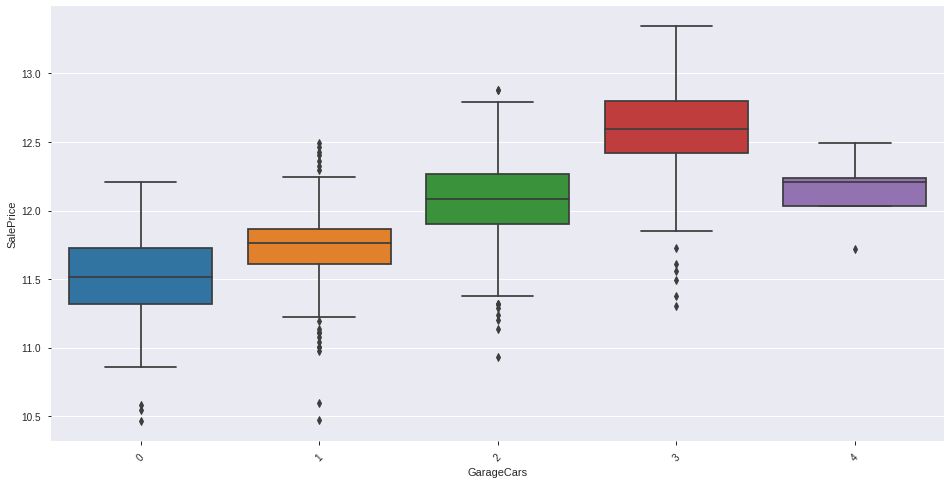

In [109]:
bplot('GarageCars')

In [110]:
train.drop('GarageCars', axis=1, inplace=True)

### GarageArea: Size of garage in square feet

Missing: 0.00% of data in GarageArea
int64


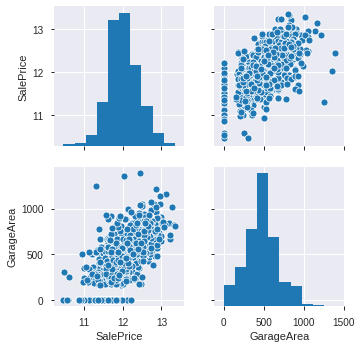

In [111]:
pplot('GarageArea')

In [112]:
train[(train.GarageArea > 1220) & (train.SalePrice < 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,Reg,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,12.442302
1061,1062,30,C (all),120.0,18000,Grvl,Reg,Low,Inside,Gtl,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,11.302204
1190,1191,190,RL,69.0,32463,Pave,Reg,Low,Inside,Mod,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,12.031719


In [113]:
train.drop(train[(train.GarageArea > 1220) & (train.SalePrice < 300000)].index, inplace=True)

Missing: 0.00% of data in GarageArea
int64


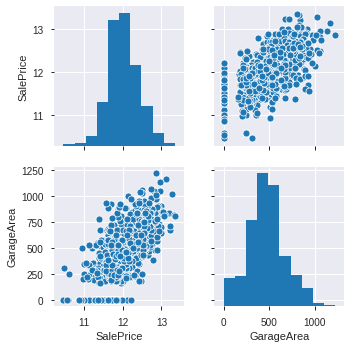

In [114]:
pplot('GarageArea')

### GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Missing: 5.60% of data in GarageQual
object


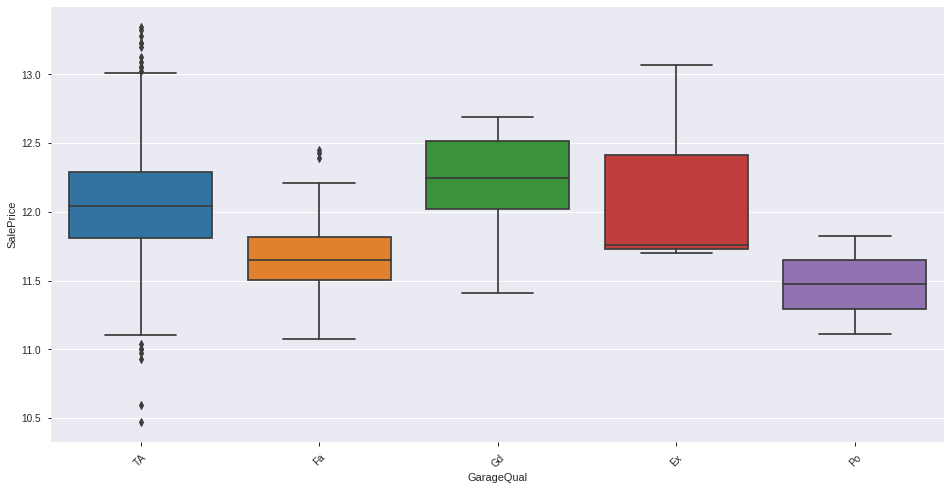

In [115]:
bplot('GarageQual')

In [116]:
train.GarageQual.fillna('NA',inplace=True)

Missing: 0.00% of data in GarageQual
object


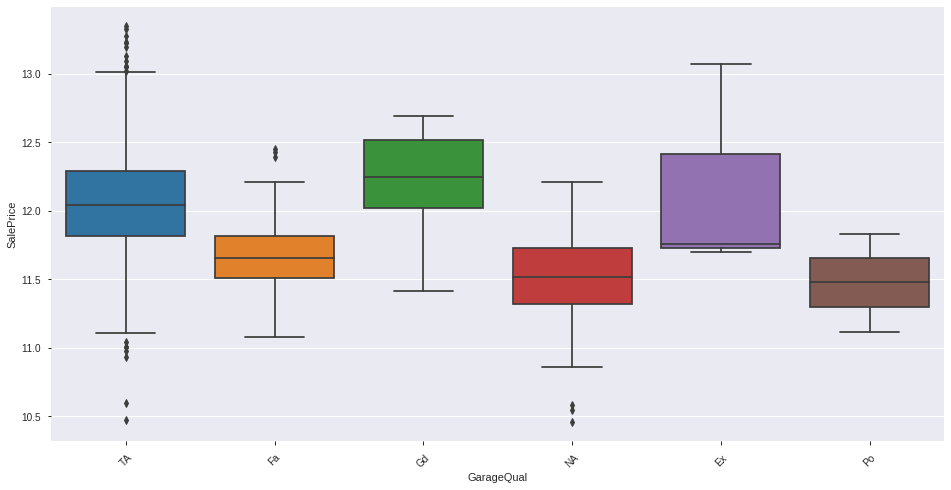

In [117]:
bplot('GarageQual')

### GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Missing: 5.60% of data in GarageCond
object


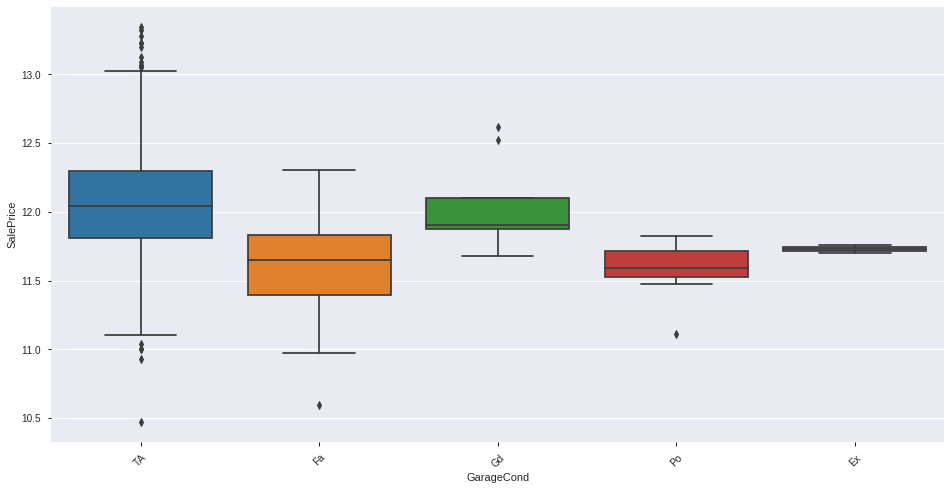

In [118]:
bplot('GarageCond')

In [119]:
train.GarageCond.fillna('NA',inplace=True)

Missing: 0.00% of data in GarageCond
object


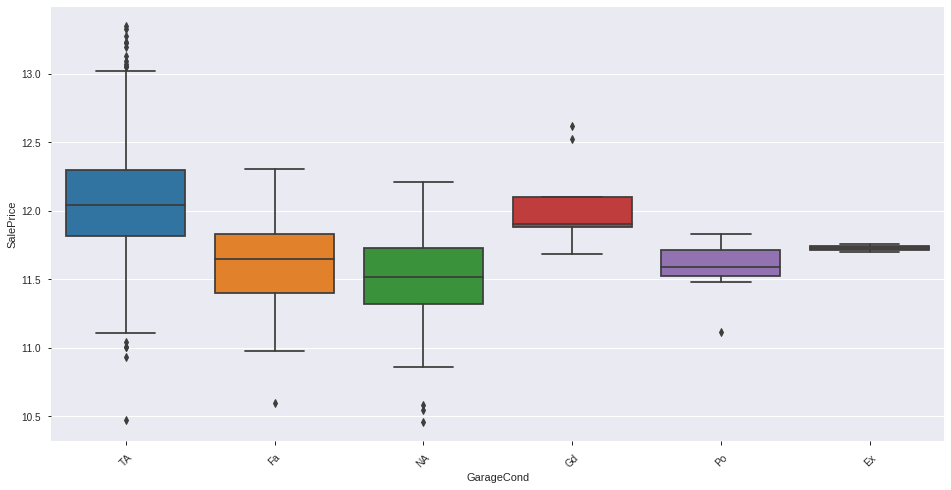

In [120]:
bplot('GarageCond')

### PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

Missing: 0.00% of data in PavedDrive
object


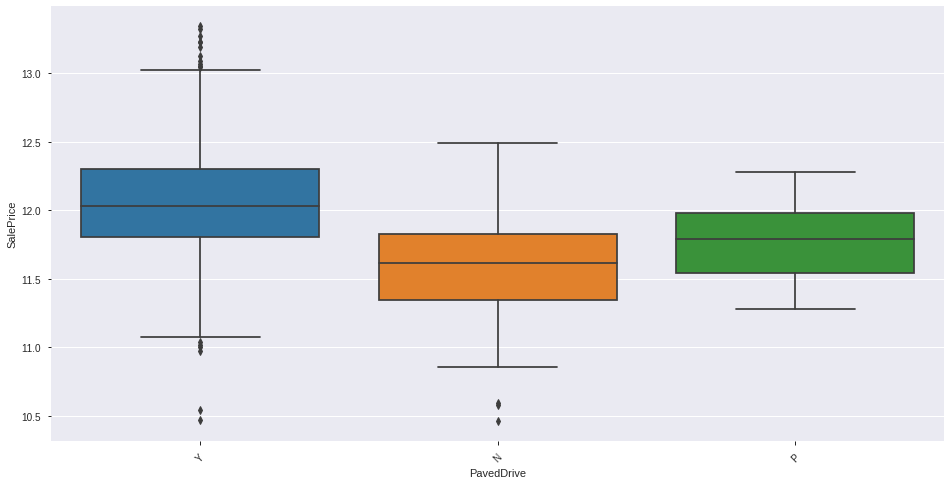

In [121]:
bplot('PavedDrive')

### WoodDeckSF: Wood deck area in square feet

Missing: 0.00% of data in WoodDeckSF
int64


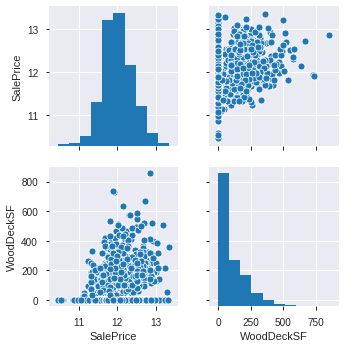

In [122]:
pplot("WoodDeckSF")

### PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Missing: 99.65% of data in PoolQC
object


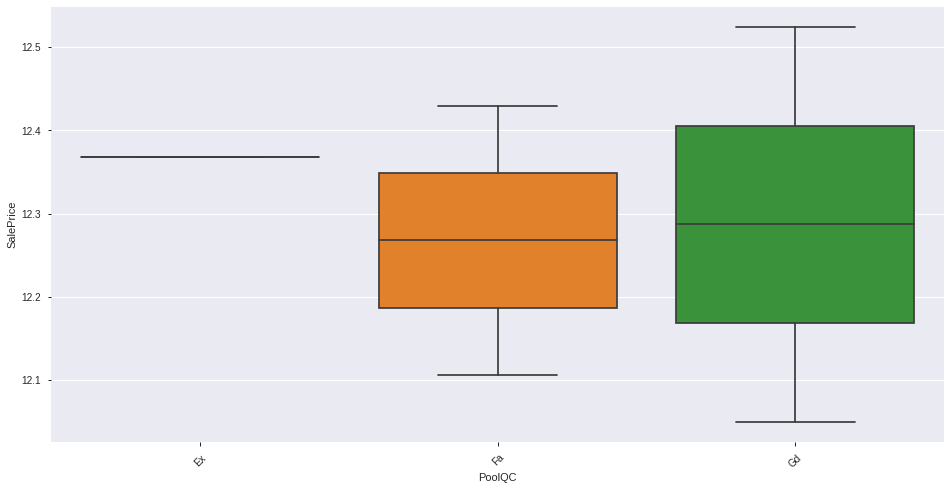

In [123]:
bplot('PoolQC')

In [124]:
train.drop('PoolQC', axis=1,inplace=True)

### Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

Missing: 80.65% of data in Fence
object


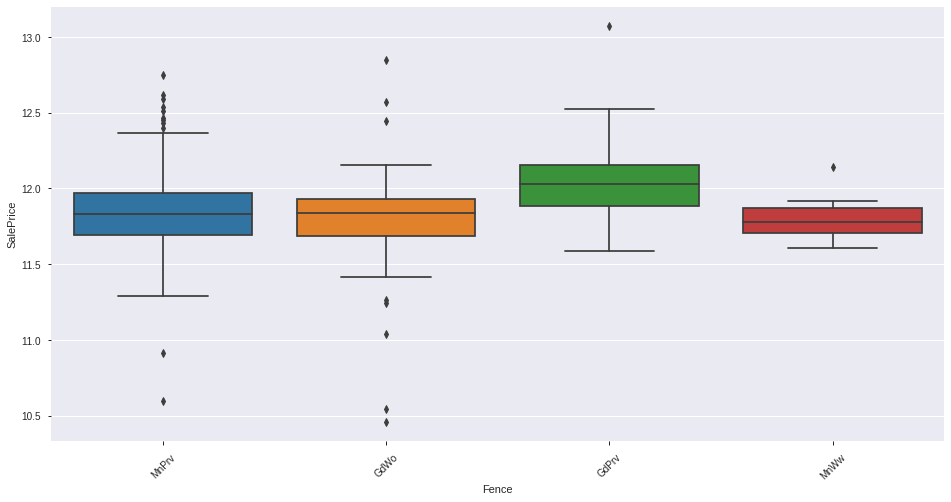

In [125]:
bplot('Fence')

In [126]:
train.drop('Fence', axis=1,inplace=True)

### MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

Missing: 96.48% of data in MiscFeature
object


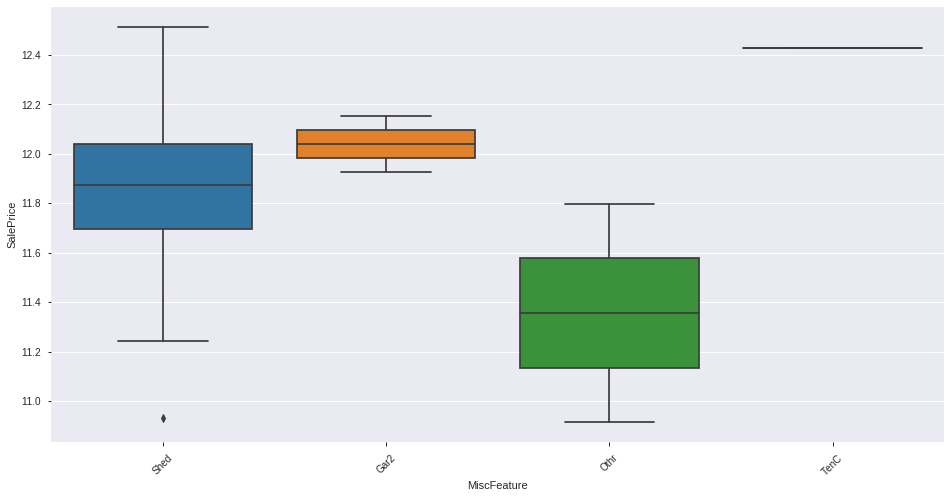

In [127]:
bplot('MiscFeature')

In [128]:
train.drop('MiscFeature', axis=1,inplace=True)

### MiscVal: $Value of miscellaneous feature

Missing: 0.00% of data in MiscVal
int64


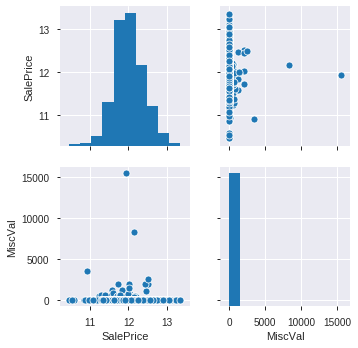

In [129]:
pplot('MiscVal')

### MoSold: Month Sold (MM)

Missing: 0.00% of data in MoSold
int64


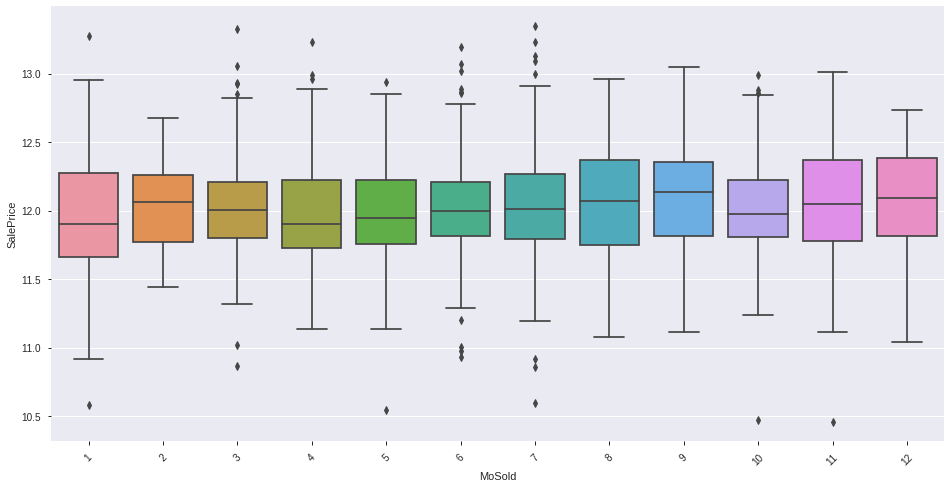

In [130]:
bplot('MoSold')

In [131]:
train.drop('MoSold',axis=1,inplace=True)

### YrSold: Year Sold (YYYY)

Missing: 0.00% of data in YrSold
int64


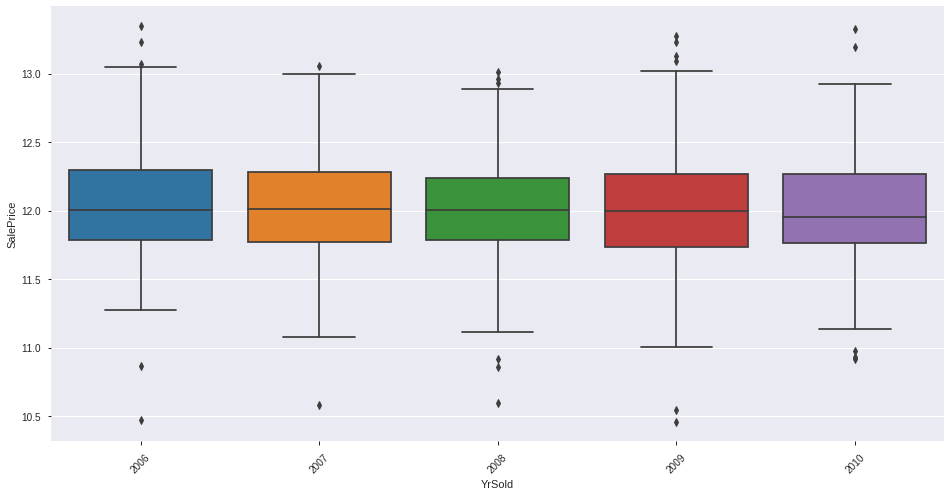

In [132]:
bplot('YrSold')

In [133]:
train.drop('YrSold',axis=1,inplace=True)

### SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

Missing: 0.00% of data in SaleType
object


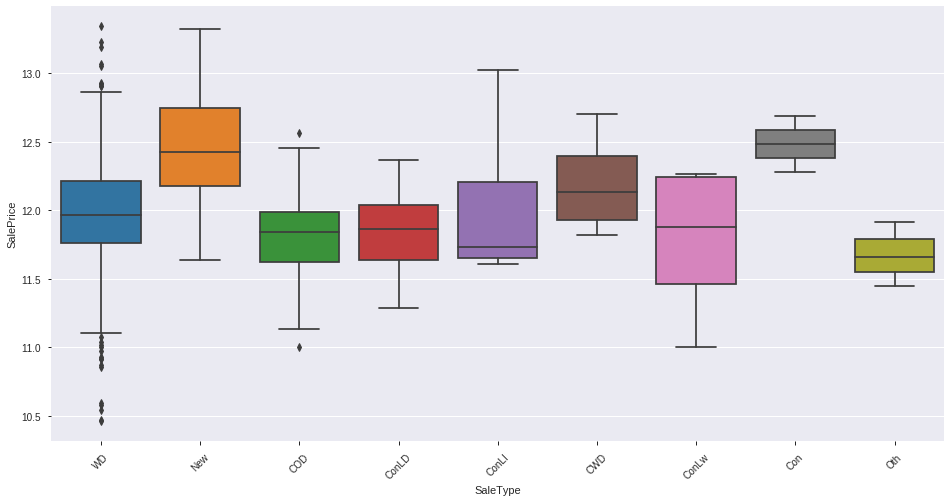

In [134]:
bplot('SaleType')

### SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Missing: 0.00% of data in SaleCondition
object


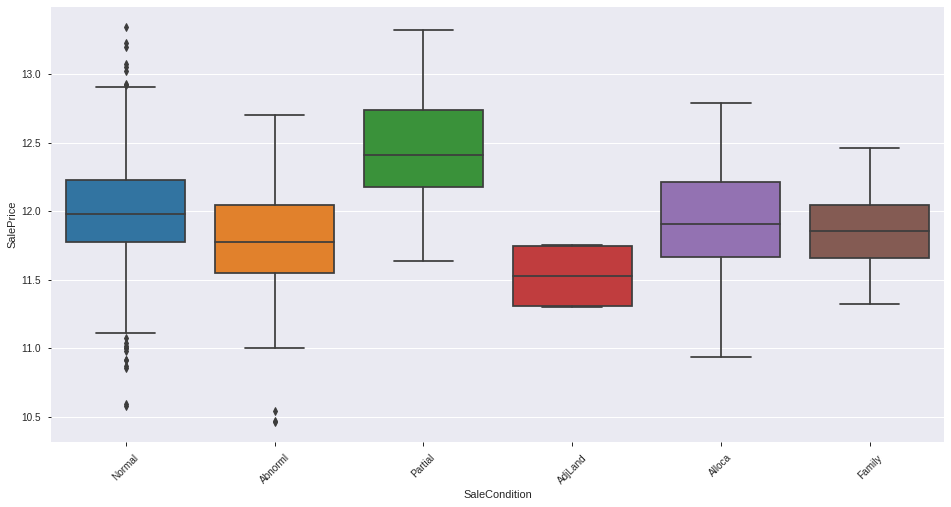

In [135]:
bplot('SaleCondition')

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1459
Data columns (total 65 columns):
Id               1447 non-null int64
MSSubClass       1447 non-null object
MSZoning         1447 non-null object
LotFrontage      1447 non-null float64
LotArea          1447 non-null int64
Street           1447 non-null object
LotShape         1447 non-null object
LandContour      1447 non-null object
LotConfig        1447 non-null object
LandSlope        1447 non-null object
Neighborhood     1447 non-null object
Condition1       1447 non-null object
Condition2       1447 non-null object
BldgType         1447 non-null object
HouseStyle       1447 non-null object
OverallQual      1447 non-null object
OverallCond      1447 non-null object
RoofStyle        1447 non-null object
RoofMatl         1447 non-null object
Exterior1st      1447 non-null object
Exterior2nd      1447 non-null object
MasVnrType       1447 non-null object
ExterQual        1447 non-null object
ExterCond        144

In [137]:
test.MSSubClass = test.MSSubClass.astype('object')
median_LotFrontage = test.LotFrontage.median()
test.LotFrontage.fillna(median_LotFrontage,inplace=True)
test.drop('Alley', axis=1, inplace=True)
test.drop('Utilities',axis=1,inplace=True)
test.OverallQual = test.OverallQual.astype('object')
test.OverallCond = test.OverallCond.astype('object')
test.drop('YearBuilt',axis=1,inplace=True)
test.drop('YearRemodAdd',axis=1,inplace=True)
test.MasVnrType.fillna('None',inplace=True)
test.MasVnrArea.fillna(0,inplace=True)
test.drop('MasVnrArea',axis=1,inplace=True)
test.BsmtQual.fillna('NA', inplace=True)
test.BsmtCond.fillna('NA', inplace=True)
test.BsmtExposure.fillna('No',inplace=True)
test.BsmtFinType1.fillna('NA',inplace=True)
test.BsmtFinType2.fillna('NA', inplace=True)
test.TotalBsmtSF = test.TotalBsmtSF + test.BsmtFinSF1 + test.BsmtFinSF2 + test.BsmtUnfSF
test.drop(['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF'], inplace=True, axis=1)
test.Electrical = test.Electrical.apply(lambda x: 'SBrkr' if x == 'SBrkr' else 'NonSB')
test.drop('LowQualFinSF', inplace=True, axis=1)
test.FireplaceQu.fillna('NA', inplace=True)
test.GarageType.fillna('NA', inplace=True)
test.drop('GarageYrBlt',inplace=True, axis=1)
test.GarageFinish.fillna('NA', inplace=True)
test.drop('GarageCars', axis=1, inplace=True)
test.GarageQual.fillna('NA',inplace=True)
test.GarageCond.fillna('NA',inplace=True)
test.drop('PoolQC', axis=1,inplace=True)
test.drop('Fence', axis=1,inplace=True)
test.drop('MiscFeature', axis=1,inplace=True)
test.drop('MoSold',axis=1,inplace=True)
test.drop('YrSold',axis=1,inplace=True)

In [141]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 64 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null object
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null object
OverallCond      1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
ExterQual        1459 non-null object
ExterCond        145

In [139]:
train.GrLivArea = np.log(train.GrLivArea)
test.GrLivArea = np.log(test.GrLivArea)

In [140]:
test.Exterior1st.fillna('Other', inplace=True)
test.Exterior2nd.fillna('Other', inplace=True)
test.GarageArea.fillna(0, inplace=True)
test.Functional.fillna('Typ', inplace=True)
test.KitchenQual.fillna(3, inplace=True)
test.BsmtFullBath.fillna(0, inplace=True)
test.BsmtHalfBath.fillna(0, inplace=True)
test.MSZoning.fillna('RL',inplace=True)
test.SaleType.fillna('WD',inplace=True)
test.TotalBsmtSF.fillna(0,inplace=True)

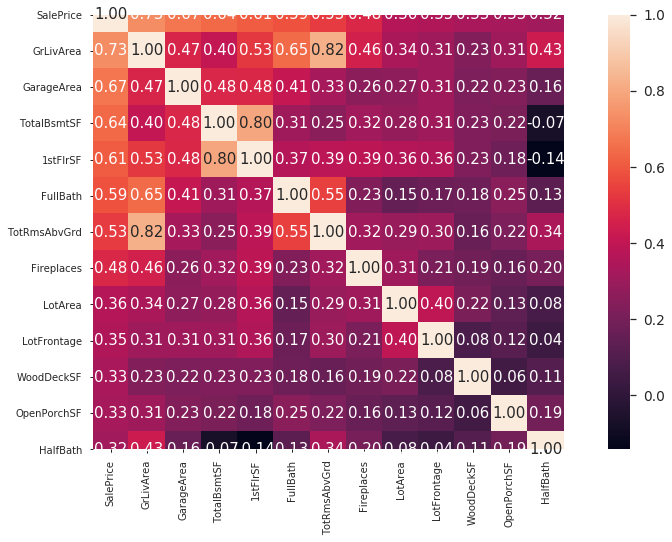

In [143]:
k = 13 #number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(16, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [144]:
profile_after_clean = pp.ProfileReport(train)
profile_after_clean.to_file(outputfile="output_clean.html")

/home/romas/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [145]:
train.shape

(1447, 65)

In [146]:
test.shape

(1459, 64)

In [147]:
train1=train.copy()
test1=test.copy()

In [148]:
col=['OpenPorchSF','3SsnPorch', 'EnclosedPorch','ScreenPorch','WoodDeckSF',
     'TotalBsmtSF','1stFlrSF','2ndFlrSF',
     'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','Id']

In [149]:
train1=train1.drop(col,axis=1)
test1=test1.drop(col,axis=1)

In [150]:
Y = train1['SalePrice']
X = train1.drop(columns=['SalePrice'])

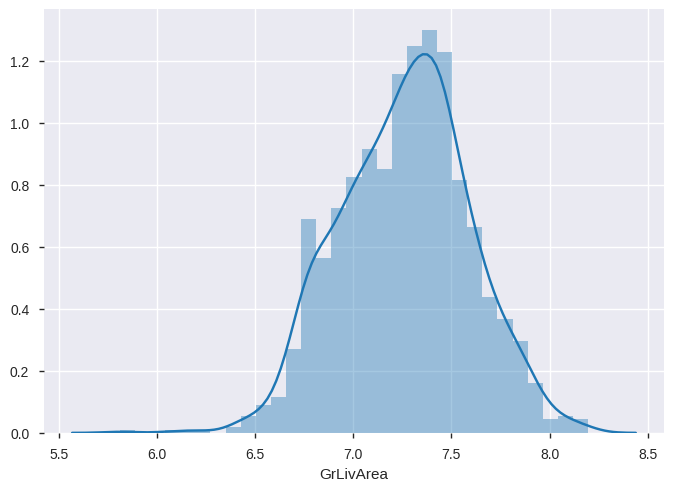

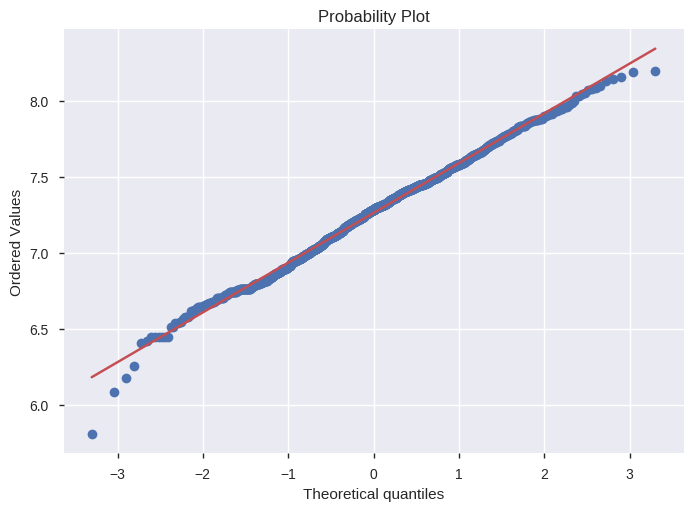

In [151]:
sns.distplot(train['GrLivArea']);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [166]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [167]:
numerics = ['int64', 'float64']

num = []
cat=[]
for i in X.columns:
    if X[i].dtype in numerics:
        
        num.append(i)
    else:
        cat.append(i)

In [168]:
num

['LotFrontage',
 'LotArea',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'PoolArea',
 'MiscVal']

In [169]:
scaler = StandardScaler()
scaler.fit(X[num])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [170]:
X[num]=scaler.transform(train1[num])
test1[num]=scaler.transform(test1[num])

In [171]:
X.shape

(1447, 51)

In [172]:
features = pd.concat([train1, test1])
features.shape

/home/romas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2906, 52)

In [173]:
X_full=pd.get_dummies(features[cat])

In [174]:
X_full.shape

(2906, 279)

In [175]:
X.shape

(1447, 51)

In [176]:
X1 = X_full.iloc[:1447,:]
t1 = X_full.iloc[1447:,:]

In [177]:
X=pd.concat((X,X1), axis=1).drop(X[cat],axis=1)

In [178]:
test1=pd.concat((test1,t1), axis=1).drop(test1[cat],axis=1)

In [232]:
from sklearn import ensemble, tree, linear_model
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [179]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [180]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [181]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [182]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [183]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [184]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [185]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [186]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1167 (0.0062)



In [187]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1217 (0.0047)



In [188]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1237 (0.0073)



In [189]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/home/romas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/romas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/romas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/romas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/romas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is 

Xgboost score: 0.1230 (0.0079)



In [190]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1261 (0.0082)



In [191]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [192]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1157 (0.0064)



In [193]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [194]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

/home/romas/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/home/romas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').